#### PRACTICAL MACHINE LEARNING
#### Assignment 1: Exploring and Visualizing Data
Author : Mike Soukup <br>

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

This assignment focuses on bringing data into Python, exploring and visualizing data. You will need to install Python on your personal computer (Mac or Windows) prior to working on this assignment. See Python installation instructions under Modules / Technology Resources / Software for Practical Machine Learning (Python version).

As part of this assignment, you are asked to choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

Background Materials
COVID 19 is an ongoing threat.  Data for the outbreak are available here:  
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide 

Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  
reference:  https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py 

Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.)

Management Questions
What are the management and analytical questions associated with this problem?

Python Programming
All programming will be done in Python.

-- Grading Guidelines (50 points)
1) Data preparation (10 points)
2) Data exploration (10 points)
3) Data visualization (10 points)
4) Data scaling and comparisons (10 points)
5) Insights from analysis (10 points)

Deliverables and File Formats
you can use this notebook to update comments or Provide a double-spaced paper with a two-page maximum for the text. The paper should include all a discussion of all graded elements but focus particularly on insights. Include your Python code and output as an appendix.  Upload this as a single .pdf file.

Formatting Python Code
Refer to Google’s Python Style Guide (Links to an external site.) for ideas about formatting Python code:

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

# Covid-19 Data Preprocessing, Transformations, and EDA

Before conducting any data visualization or exploration, I loaded my data into a Pandas DataFrame and cleaned it up. To do this, I first identified the shape and data types composing the dataframe. I also had to be cognizant that the data downloaded from the ECDC website was in weekly data increments instead of daily increments. I addressed all missing values within the dataset stemming from Namibia’s geoId, data withheld from a Japanese cruiseliner, data withheld from the territory of Wallis and Futuna, and imputing “New Cases over a 14 day period per 100K citizen” values for a country’s first entry in the data set. No duplicated rows were observed. The remaining data cleaning consisted of putting date information into ISO 8601 standard format and addressing some unfeasible negative values. After all data was cleaned, a new dataframe was created by aggregating Cases, Deaths, and Population data by country. 

The data was explored with descriptive statistics, aggregations, sorting, and visualizations. Time series graphs were utilized to understand Covid-19 incidence and fatality rates from a worldwide and country by country basis. Univariate distributions such as cumulative Covid-19 Cases and Deaths by country were also explored with histograms and boxplots then supported with descriptive statistics. Scatter plots, Pair plots, and Correlation Heat Maps were used to understand the relationships of bivariate data. Features such as Cases_per_1M citizens, Deaths_per_1M citizens, and Deaths_per_Cases were created to better understand the incidence and fatality rates of Covid-19 in individual countries by normalizing aggregated case and death counts by the population and normalizing deaths by cases for each country.  

This investigation revealed that worldwide Covid-19 cases accelerated at the end of 2020 and into 2021. The worldwide incidence rate is at an all time high surpassing 1.75M new cases per week. Likewise, the worldwide Covid-19 fatality rate has accelerated over the same time period eclipsing 20,000 deaths per week. When looking at the cases and deaths time series charts, it is clear that the worldwide explosion of Covid-19 is largely attributed to the United States’ inability to inhibit the spread of this virus. The United States accounts for approximately 25% of Covid-19 cases and 20% of the deaths worldwide. This is startling considering the U.S. makes up only 4.3% of the worldwide population and is largely regarded as a leader in science, technology, and health care. 

When considering the distributions of cumulative Cases and Deaths for each country, the histograms are very skewed. The Fisher-Pearson coefficient of skewness values are 9.44 and 7.45, respectively. This is not surprising considering that the country population histogram is heavily right-skewed as well with a skewness value of 8.77. However, even after normalizing the case and death counts by population for each country, the distributions are still strongly right tailed. The skewness values were reduced for these created features with values of 2.46 and 1.47, respectively. Based on these observations, it was no surprise to find that Covid-19 Cases and Deaths are strongly correlated. Cases and Deaths have a correlation coefficient of 0.955 and the normalized variables of Cases_per_1M and Deaths_per_1M are strongly correlated with a coefficient of 0.790. Lastly, the graph of Deaths_per_1M vs. Cases_per_1M indicates that the typical fatality rate of those infected with Covid-19 is approximately 1.5% and this rate appears to increase in larger countries. 

The sklearn.preprocessing package was also used to perform min-max and standard scaling for features within the aggregated dataframe. Both min-max and standard scaling transformations were able to preserve the distribution shapes for all six features. StandardScaler ensured that all six features had a mean of zero and unit variance. The minimum and maximum values of the StandardScaler transformation varied with each feature yielding no clear upper or lower limit. On the other hand, MinMaxScaler transformed the dataset such that each feature had a minimum value of 0 and a maximum value of 1. The mean, standard deviation, and percentiles for each feature differed with no clear pattern with the min-max transformation. The ability for the min-max transformation to preserve the distribution shape was surprising to me. Since these distributions are so heavily right skewed containing substantial outliers, I expected the min-max transformation to crush the lower values compared to the outlying data points and that the standard scaling transformation would outperform the min-max transformation based on visual observation. However, the eye test indicates both transformations performed a similar job, each with its own nuances. 

# Appendix

### Start by Bringing in the new data

In [1]:
###Loading Packages###
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
import geopandas as gpd
from prettytable import PrettyTable
import sklearn
import math
from datetime import datetime

%matplotlib inline

In [2]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (12, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'

init_plotting()

# avoid empty plot, always good to close plot
plt.close()

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

### Data Cleaning and Pre-Processing

In [4]:
##Load in the data
covid = pd.read_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 1/Exercises/Assignment/MTS_MSDS422_Assignment1/covid19_20201214.csv")

In [5]:
##Get an understanding of the data:
print("Shape:", covid.shape,"\n")
print("Variable Types:") 
print(covid.dtypes)

Shape: (9791, 10) 

Variable Types:
dateRep                                             object
year_week                                           object
cases_weekly                                         int64
deaths_weekly                                        int64
countriesAndTerritories                             object
geoId                                               object
countryterritoryCode                                object
popData2019                                        float64
continentExp                                        object
notification_rate_per_100000_population_14-days    float64
dtype: object


In [6]:
##Look at the head of the dataframe
covid.head(10)

dateRep year_week  cases_weekly  deaths_weekly countriesAndTerritories  \
0  11/01/2021   2021-01           675             71             Afghanistan   
1  04/01/2021   2020-53           902             60             Afghanistan   
2  28/12/2020   2020-52          1994             88             Afghanistan   
3  21/12/2020   2020-51           740            111             Afghanistan   
4  14/12/2020   2020-50          1757             71             Afghanistan   
5  07/12/2020   2020-49          1672            137             Afghanistan   
6  30/11/2020   2020-48          1073             68             Afghanistan   
7  23/11/2020   2020-47          1368             69             Afghanistan   
8  16/11/2020   2020-46          1164             61             Afghanistan   
9  09/11/2020   2020-45           606             24             Afghanistan   

  geoId countryterritoryCode  popData2019 continentExp  \
0    AF                  AFG   38041757.0         Asia   
1    AF                  AFG   38041757.0         Asia   
2    AF                  AFG   38041757.0         Asia   
3    AF                  AFG   38041757.0         Asia   
4    AF                  AFG   38041757.0         Asia   
5    AF                  AFG   38041757.0         Asia   
6    AF                  AFG   38041757.0         Asia   
7    AF                  AFG   38041757.0         Asia   
8    AF                  AFG   38041757.0         Asia   
9    AF                  AFG   38041757.0         Asia   

   notification_rate_per_100000_population_14-days  
0                                             4.15  
1                                             7.61  
2                                             7.19  
3                                             6.56  
4                                             9.01  
5                                             7.22  
6                                             6.42  
7                                             6.66  
8                                             4.65  
9                                             3.70

Notice this data is reported as weekly and not daily. From the ECDC website, this is because "daily data collection is based on the fact that the daily number of cases is frequently subject to retrospective corrections, delays in reporting and/or clustered reporting of data for several days. Consequently, day to day variations in the number of cases does not constitute a valid basis for policy decisions. ECDC continues to monitor events and reports of concern through its epidemic intelligence, and will disseminate important information arising from this activity as and when relevant to inform public health action." - https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [7]:
### examine the structure of the DataFrame object###
print('\nContents of covid19 data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Rows =', len(covid), '\n') 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
covid.columns


Contents of covid19 data ---------------

Number of Rows = 9791 



Index(['dateRep', 'year_week', 'cases_weekly', 'deaths_weekly',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'notification_rate_per_100000_population_14-days'],
      dtype='object')

In [8]:
#Look at datatypes and for missing values
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9791 entries, 0 to 9790
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   dateRep                                          9791 non-null   object 
 1   year_week                                        9791 non-null   object 
 2   cases_weekly                                     9791 non-null   int64  
 3   deaths_weekly                                    9791 non-null   int64  
 4   countriesAndTerritories                          9791 non-null   object 
 5   geoId                                            9747 non-null   object 
 6   countryterritoryCode                             9769 non-null   object 
 7   popData2019                                      9769 non-null   float64
 8   continentExp                                     9791 non-null   object 
 9   notification_rate_per_100000_p

In [9]:
#It appears some values are missings, let's examine how many entries are missing from each column:
for i in covid.columns:
    print("Number of missing values in {} column:".format(i), covid['{}'.format(i)].isnull().sum())

Number of missing values in dateRep column: 0
Number of missing values in year_week column: 0
Number of missing values in cases_weekly column: 0
Number of missing values in deaths_weekly column: 0
Number of missing values in countriesAndTerritories column: 0
Number of missing values in geoId column: 44
Number of missing values in countryterritoryCode column: 22
Number of missing values in popData2019 column: 22
Number of missing values in continentExp column: 0
Number of missing values in notification_rate_per_100000_population_14-days column: 235


In [10]:
#Look at the number of unique countries:
print("Number of Countries with Data:", len(covid.countriesAndTerritories.unique()))

Number of Countries with Data: 215


In [11]:
#Look at the missing geoId data:
covid[covid['geoId'].isnull()]

dateRep year_week  cases_weekly  deaths_weekly  \
6253  11/01/2021   2021-01          3216             43   
6254  04/01/2021   2020-53          3099             25   
6255  28/12/2020   2020-52          3573             16   
6256  21/12/2020   2020-51          2178             17   
6257  14/12/2020   2020-50          1458              8   
6258  07/12/2020   2020-49           733              1   
6259  30/11/2020   2020-48           480              6   
6260  23/11/2020   2020-47           357              7   
6261  16/11/2020   2020-46           297              4   
6262  09/11/2020   2020-45           223              1   
6263  02/11/2020   2020-44           328              0   
6264  26/10/2020   2020-43           367              2   
6265  19/10/2020   2020-42           357              3   
6266  12/10/2020   2020-41           310              5   
6267  05/10/2020   2020-40           593              4   
6268  28/09/2020   2020-39           656              7   
6269  21/09/2020   2020-38           658             11   
6270  14/09/2020   2020-37          1034             12   
6271  07/09/2020   2020-36          1320             17   
6272  31/08/2020   2020-35          1511             20   
6273  24/08/2020   2020-34          1700             17   
6274  17/08/2020   2020-33          1205             16   
6275  10/08/2020   2020-32           655              8   
6276  03/08/2020   2020-31           519              3   
6277  27/07/2020   2020-30           528              5   
6278  20/07/2020   2020-29           462              2   
6279  13/07/2020   2020-28           373              1   
6280  06/07/2020   2020-27           229              0   
6281  29/06/2020   2020-26           128              0   
6282  22/06/2020   2020-25            23              0   
6283  15/06/2020   2020-24             3              0   
6284  08/06/2020   2020-23             5              0   
6285  01/06/2020   2020-22             3              0   
6286  25/05/2020   2020-21             5              0   
6287  18/05/2020   2020-20             0              0   
6288  11/05/2020   2020-19             0              0   
6289  04/05/2020   2020-18             0              0   
6290  27/04/2020   2020-17             0              0   
6291  20/04/2020   2020-16             0              0   
6292  13/04/2020   2020-15             0              0   
6293  06/04/2020   2020-14             5              0   
6294  30/03/2020   2020-13             8              0   
6295  23/03/2020   2020-12             1              0   
6296  16/03/2020   2020-11             2              0   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
6253                 Namibia   NaN                  NAM    2494524.0   
6254                 Namibia   NaN                  NAM    2494524.0   
6255                 Namibia   NaN                  NAM    2494524.0   
6256                 Namibia   NaN                  NAM    2494524.0   
6257                 Namibia   NaN                  NAM    2494524.0   
6258                 Namibia   NaN                  NAM    2494524.0   
6259                 Namibia   NaN                  NAM    2494524.0   
6260                 Namibia   NaN                  NAM    2494524.0   
6261                 Namibia   NaN                  NAM    2494524.0   
6262                 Namibia   NaN                  NAM    2494524.0   
6263                 Namibia   NaN                  NAM    2494524.0   
6264                 Namibia   NaN                  NAM    2494524.0   
6265                 Namibia   NaN                  NAM    2494524.0   
6266                 Namibia   NaN                  NAM    2494524.0   
6267                 Namibia   NaN                  NAM    2494524.0   
6268                 Namibia   NaN                  NAM    2494524.0   
6269                 Namibia   NaN                  NAM    2494524.0   
6270                 Namibia   NaN                  NAM  

It looks like only Namibia is missing it's geoId. Right now I don't plan on doing any geoPlotting so this should be fine. But worth understanding incase I want to take a look at that further down the line. But at the same time, the geoIds just look like two letter acronyms for each country. According to this website: https://laendercode.net/en/2-letter-list.html the Nambia geoId should be NA, which may be why it got confused as NaN upon reading from the .csv file. This assumption is verified when the .csv raw data is analyzed. The Namibia geoId is actually NA and when read into a pandas dataframe got interpretted as NaN / missing value. Can simply replace withe the proper string entry.

In [12]:
#Set Namibia geoId as string NA
covid['geoId'][covid['countriesAndTerritories'] == 'Namibia'] = 'NA'

In [13]:
#Confirm Namibia geoId was replaced properly:
covid[covid['countriesAndTerritories'] == 'Namibia'].head(5)

dateRep year_week  cases_weekly  deaths_weekly  \
6253  11/01/2021   2021-01          3216             43   
6254  04/01/2021   2020-53          3099             25   
6255  28/12/2020   2020-52          3573             16   
6256  21/12/2020   2020-51          2178             17   
6257  14/12/2020   2020-50          1458              8   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
6253                 Namibia    NA                  NAM    2494524.0   
6254                 Namibia    NA                  NAM    2494524.0   
6255                 Namibia    NA                  NAM    2494524.0   
6256                 Namibia    NA                  NAM    2494524.0   
6257                 Namibia    NA                  NAM    2494524.0   

     continentExp  notification_rate_per_100000_population_14-days  
6253       Africa                                           253.15  
6254       Africa                                           267.47  
6255       Africa                                           230.54  
6256       Africa                                           145.76  
6257       Africa                                            87.83

In [14]:
#Look at the missing countryterritoryCode  data:
covid[covid['countryterritoryCode'].isnull()]

dateRep year_week  cases_weekly  deaths_weekly  \
1728  02/03/2020   2020-09            14              3   
1729  24/02/2020   2020-08           336              3   
1730  17/02/2020   2020-07           285              0   
1731  10/02/2020   2020-06            70              0   
1732  03/02/2020   2020-05             0              0   
1733  27/01/2020   2020-04             0              0   
1734  20/01/2020   2020-03             0              0   
1735  13/01/2020   2020-02             0              0   
1736  06/01/2020   2020-01             0              0   
9614  11/01/2021   2021-01             0              0   
9615  04/01/2021   2020-53             0              0   
9616  28/12/2020   2020-52             0              0   
9617  21/12/2020   2020-51             1              0   
9618  14/12/2020   2020-50             0              0   
9619  07/12/2020   2020-49             0              0   
9620  30/11/2020   2020-48             1              0   
9621  23/11/2020   2020-47             1              0   
9622  16/11/2020   2020-46             0              0   
9623  09/11/2020   2020-45             0              0   
9624  02/11/2020   2020-44             0              0   
9625  26/10/2020   2020-43             0              0   
9626  19/10/2020   2020-42             1              0   

                         countriesAndTerritories     geoId  \
1728  Cases_on_an_international_conveyance_Japan  JPG11668   
1729  Cases_on_an_international_conveyance_Japan  JPG11668   
1730  Cases_on_an_international_conveyance_Japan  JPG11668   
1731  Cases_on_an_international_conveyance_Japan  JPG11668   
1732  Cases_on_an_international_conveyance_Japan  JPG11668   
1733  Cases_on_an_international_conveyance_Japan  JPG11668   
1734  Cases_on_an_international_conveyance_Japan  JPG11668   
1735  Cases_on_an_international_conveyance_Japan  JPG11668   
1736  Cases_on_an_international_conveyance_Japan  JPG11668   
9614                           Wallis_and_Futuna        WF   
9615                           Wallis_and_Futuna        WF   
9616                           Wallis_and_Futuna        WF   
9617                           Wallis_and_Futuna        WF   
9618                           Wallis_and_Futuna        WF   
9619                           Wallis_and_Futuna        WF   
9620                           Wallis_and_Futuna        WF   
9621                           Wallis_and_Futuna        WF   
9622                           Wallis_and_Futuna        WF   
9623                           Wallis_and_Futuna        WF   
9624                           Wallis_and_Futuna        WF   
9625                           Wallis_and_Futuna        WF   
9626                           Wallis_and_Futuna        WF   

     countryterritoryCode  popData2019 continentExp  \
1728                  NaN          NaN        Other   
1729                  NaN          NaN        Other   
1730                  NaN          NaN        Other   
1731                  NaN          NaN        Other   
1732                  NaN          NaN        Other   
1733                  NaN          NaN        Other   
1734                  NaN          NaN        Other   
1735                  NaN          NaN        Other   
1736                  NaN          NaN        Other   
9614                  NaN          NaN      Oceania   
9615                  NaN          NaN      Oceania   
9616                  NaN          NaN      Oceania   
9617                  NaN          NaN      Oceania   
9618                  NaN          NaN      Oceania   
9619                  NaN          NaN      Oceania   
9620                  NaN          NaN      Oceania   
9621                  NaN          NaN      Oceania   
9622                  NaN          NaN      Oceania   
9623                  NaN          NaN      Oceania   
9624                  NaN          NaN      Oceania   
9625                  NaN          NaN      Oceania   
9626          

Missing country territory code is there for an international cruise ship and for the territory of Wallis and Futuna.

A quick Google search pulled up the Japan Cruise in question here: https://wwwnc.cdc.gov/eid/article/26/11/20-1165_article . There were 2,666 passengers and 1,045 crew on this cruise for a total ship head count of 3,711. The total headcount on board the cruise ship will serve as a decent proxy for its population value. The value is very small related to most other countries population so I will not need to redact any values from other countries, this would be very difficult to accomplish properly as well. For the countryterritoryCode, I will just add the string Cruise for each entry

In [15]:
#Make the cruise population value 3,711 persons and set the country and territory code to cruise
covid['popData2019'][covid['countriesAndTerritories'] == 'Cases_on_an_international_conveyance_Japan'] = 3711
covid['countryterritoryCode'][covid['countriesAndTerritories'] == 'Cases_on_an_international_conveyance_Japan'] = 'Cruise'

In [16]:
#Look at the missing data for Wallis and Futuna
covid[covid['countriesAndTerritories'] == 'Wallis_and_Futuna']

dateRep year_week  cases_weekly  deaths_weekly  \
9614  11/01/2021   2021-01             0              0   
9615  04/01/2021   2020-53             0              0   
9616  28/12/2020   2020-52             0              0   
9617  21/12/2020   2020-51             1              0   
9618  14/12/2020   2020-50             0              0   
9619  07/12/2020   2020-49             0              0   
9620  30/11/2020   2020-48             1              0   
9621  23/11/2020   2020-47             1              0   
9622  16/11/2020   2020-46             0              0   
9623  09/11/2020   2020-45             0              0   
9624  02/11/2020   2020-44             0              0   
9625  26/10/2020   2020-43             0              0   
9626  19/10/2020   2020-42             1              0   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
9614       Wallis_and_Futuna    WF                  NaN          NaN   
9615       Wallis_and_Futuna    WF                  NaN          NaN   
9616       Wallis_and_Futuna    WF                  NaN          NaN   
9617       Wallis_and_Futuna    WF                  NaN          NaN   
9618       Wallis_and_Futuna    WF                  NaN          NaN   
9619       Wallis_and_Futuna    WF                  NaN          NaN   
9620       Wallis_and_Futuna    WF                  NaN          NaN   
9621       Wallis_and_Futuna    WF                  NaN          NaN   
9622       Wallis_and_Futuna    WF                  NaN          NaN   
9623       Wallis_and_Futuna    WF                  NaN          NaN   
9624       Wallis_and_Futuna    WF                  NaN          NaN   
9625       Wallis_and_Futuna    WF                  NaN          NaN   
9626       Wallis_and_Futuna    WF                  NaN          NaN   

     continentExp  notification_rate_per_100000_population_14-days  
9614      Oceania                                              NaN  
9615      Oceania                                              NaN  
9616      Oceania                                              NaN  
9617      Oceania                                              NaN  
9618      Oceania                                              NaN  
9619      Oceania                                              NaN  
9620      Oceania                                              NaN  
9621      Oceania                                              NaN  
9622      Oceania                                              NaN  
9623      Oceania                                              NaN  
9624      Oceania                                              NaN  
9625      Oceania                                              NaN  
9626      Oceania                                              NaN

There is a lot of missing data from the territory of Wallis and Futuna. This territory has minimal cases, so I will drop their records from the data set.

In [17]:
#Drop Wallis and Futuna data
covid.drop(covid[covid['countriesAndTerritories'] == 'Wallis_and_Futuna'].index, inplace = True)

In [18]:
#Verify Wallis and Futuna was dropped:
covid[covid['countriesAndTerritories'] == 'Wallis_and_Futuna'].sum()

dateRep                                            0.0
year_week                                          0.0
cases_weekly                                       0.0
deaths_weekly                                      0.0
countriesAndTerritories                            0.0
geoId                                              0.0
countryterritoryCode                               0.0
popData2019                                        0.0
continentExp                                       0.0
notification_rate_per_100000_population_14-days    0.0
dtype: float64

In [19]:
#Re-check missing values that need to be addressed
for i in covid.columns:
    print("Number of missing values in {} column:".format(i), covid['{}'.format(i)].isnull().sum())

Number of missing values in dateRep column: 0
Number of missing values in year_week column: 0
Number of missing values in cases_weekly column: 0
Number of missing values in deaths_weekly column: 0
Number of missing values in countriesAndTerritories column: 0
Number of missing values in geoId column: 0
Number of missing values in countryterritoryCode column: 0
Number of missing values in popData2019 column: 0
Number of missing values in continentExp column: 0
Number of missing values in notification_rate_per_100000_population_14-days column: 222


In [20]:
#Now address remaining 222 missing notification_rate_per_100000_population_14-days entries
#First change column name:
covid.rename(columns = {'notification_rate_per_100000_population_14-days':'New Cases 14Day per 100K'}, inplace = True)

In [21]:
covid[covid['New Cases 14Day per 100K'].isnull()]

dateRep year_week  cases_weekly  deaths_weekly  \
53    06/01/2020   2020-01             0              0   
98    09/03/2020   2020-10             2              0   
152   06/01/2020   2020-01             0              0   
196   16/03/2020   2020-11             5              0   
239   23/03/2020   2020-12             2              0   
...          ...       ...           ...            ...   
9613  06/01/2020   2020-01             0              0   
9664  27/04/2020   2020-17             6              0   
9704  13/04/2020   2020-15             1              0   
9747  23/03/2020   2020-12             3              0   
9790  23/03/2020   2020-12             2              0   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
53               Afghanistan    AF                  AFG   38041757.0   
98                   Albania    AL                  ALB    2862427.0   
152                  Algeria    DZ                  DZA   43053054.0   
196                  Andorra    AD                  AND      76177.0   
239                   Angola    AO                  AGO   31825299.0   
...                      ...   ...                  ...          ...   
9613                 Vietnam    VN                  VNM   96462108.0   
9664          Western_Sahara    EH                  ESH     582458.0   
9704                   Yemen    YE                  YEM   29161922.0   
9747                  Zambia    ZM                  ZMB   17861034.0   
9790                Zimbabwe    ZW                  ZWE   14645473.0   

     continentExp  New Cases 14Day per 100K  
53           Asia                       NaN  
98         Europe                       NaN  
152        Africa                       NaN  
196        Europe                       NaN  
239        Africa                       NaN  
...           ...                       ...  
9613         Asia                       NaN  
9664       Africa                       NaN  
9704         Asia                       NaN  
9747       Africa                       NaN  
9790       Africa                       NaN  

[222 rows x 10 columns]

In [22]:
#Lets look at the rows around 53 to see if there is some sort of pattern here:
covid[50:60]

dateRep year_week  cases_weekly  deaths_weekly countriesAndTerritories  \
50  27/01/2020   2020-04             0              0             Afghanistan   
51  20/01/2020   2020-03             0              0             Afghanistan   
52  13/01/2020   2020-02             0              0             Afghanistan   
53  06/01/2020   2020-01             0              0             Afghanistan   
54  11/01/2021   2021-01          4157             48                 Albania   
55  04/01/2021   2020-53          2866             29                 Albania   
56  28/12/2020   2020-52          3569             76                 Albania   
57  21/12/2020   2020-51          4473             85                 Albania   
58  14/12/2020   2020-50          5542             98                 Albania   
59  07/12/2020   2020-49          5363            107                 Albania   

   geoId countryterritoryCode  popData2019 continentExp  \
50    AF                  AFG   38041757.0         Asia   
51    AF                  AFG   38041757.0         Asia   
52    AF                  AFG   38041757.0         Asia   
53    AF                  AFG   38041757.0         Asia   
54    AL                  ALB    2862427.0       Europe   
55    AL                  ALB    2862427.0       Europe   
56    AL                  ALB    2862427.0       Europe   
57    AL                  ALB    2862427.0       Europe   
58    AL                  ALB    2862427.0       Europe   
59    AL                  ALB    2862427.0       Europe   

    New Cases 14Day per 100K  
50                      0.00  
51                      0.00  
52                      0.00  
53                       NaN  
54                    245.35  
55                    224.81  
56                    280.95  
57                    349.88  
58                    380.97  
59                    357.28

The NaN value in the New Cases 14Day per 100K column appears to be the first entry for that country within the data set. So what I will do is loop through and fill in those values for each circumstances by calculating: (cases_weekly / popData2019) * 100,000 assuming that there were no Covid-19 cases prior to the countries first entry in this dataset.

In [23]:
#First need to re-index the data because some data has been eliminated
covid = covid.reset_index()

In [24]:
covid = covid.drop(columns = ['index'])

In [25]:
idx = covid[covid['New Cases 14Day per 100K'].isnull()].index
for j in idx:
    covid.iloc[j, covid.columns.get_loc('New Cases 14Day per 100K')] = ((covid.iloc[j]['cases_weekly'])/covid.iloc[j]['popData2019'])*100000

In [26]:
#Re-check for any more missing values in the dataframe:
for i in covid.columns:
    print("Number of missing values in {} column:".format(i), covid['{}'.format(i)].isnull().sum())

Number of missing values in dateRep column: 0
Number of missing values in year_week column: 0
Number of missing values in cases_weekly column: 0
Number of missing values in deaths_weekly column: 0
Number of missing values in countriesAndTerritories column: 0
Number of missing values in geoId column: 0
Number of missing values in countryterritoryCode column: 0
Number of missing values in popData2019 column: 0
Number of missing values in continentExp column: 0
Number of missing values in New Cases 14Day per 100K column: 0


Now all missing values have been accounted for.

In [27]:
##Now check if there are any duplicate entries:
covid.duplicated().sum()

0

All missing values have been accounted for and there are no duplicated rows that need to be addressed.

#### Date Column formatted into ISO 8601 standard format (Year - Month - Day)

In [28]:
#Set the Date column to ISO date standard
covid.rename(columns = {'dateRep':'Date'}, inplace = True)

In [29]:
covid['Date']=pd.to_datetime(covid['Date'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
covid['Date']=pd.to_datetime(covid['Date'], format='%Y/%m/%d')
covid['Date'].head()

0   2021-01-11
1   2021-01-04
2   2020-12-28
3   2020-12-21
4   2020-12-14
Name: Date, dtype: datetime64[ns]

In [30]:
#Verify date format modification worked
covid.head()

Date year_week  cases_weekly  deaths_weekly countriesAndTerritories  \
0 2021-01-11   2021-01           675             71             Afghanistan   
1 2021-01-04   2020-53           902             60             Afghanistan   
2 2020-12-28   2020-52          1994             88             Afghanistan   
3 2020-12-21   2020-51           740            111             Afghanistan   
4 2020-12-14   2020-50          1757             71             Afghanistan   

  geoId countryterritoryCode  popData2019 continentExp  \
0    AF                  AFG   38041757.0         Asia   
1    AF                  AFG   38041757.0         Asia   
2    AF                  AFG   38041757.0         Asia   
3    AF                  AFG   38041757.0         Asia   
4    AF                  AFG   38041757.0         Asia   

   New Cases 14Day per 100K  
0                      4.15  
1                      7.61  
2                      7.19  
3                      6.56  
4                      9.01

Now I should have all my data pre-processed to start looking at time series data.

### EDA - Visualization and Descriptive Statistics

In [31]:
#Look at summary statistic information
covid.describe().transpose().round(1)

count        mean          std     min        25%  \
cases_weekly              9778.0      9184.1      55657.7 -3864.0        8.0   
deaths_weekly             9778.0       198.5        927.3  -875.0        0.0   
popData2019               9778.0  40393476.8  151436428.1   815.0  1293120.0   
New Cases 14Day per 100K  9778.0        78.1        222.8  -132.6        0.7   

                                50%         75%           max  
cases_weekly                  168.0      2350.5  1.782792e+06  
deaths_weekly                   2.0        37.0  2.285200e+04  
popData2019               7169456.0  28515829.0  1.433784e+09  
New Cases 14Day per 100K        7.1        59.1  9.054200e+03

Looking at the descripitive statistics for this data we can realize that the average number of new cases per week per country is 9184 and the average deaths per week per country is 198. Each row represents a week and a country. It is worth noting that their are negative min values in the new cases_weekly and deaths_weekly. This is not an appropriate data entry and should be addressed. This data is not intended to count people being "cured" of covid nor can people come back to life. This will be investigated:

In [32]:
#Look at data entries were cases_weekly were less than 0.
covid[covid['cases_weekly'] < 0]

Date year_week  cases_weekly  deaths_weekly  \
997  2020-05-25   2020-21          -148              1   
2673 2020-09-07   2020-36         -3864           3969   
4762 2020-09-14   2020-37            -4              0   
4812 2020-07-27   2020-30           -50              0   
5402 2020-05-04   2020-18           -28              5   
5439 2020-08-31   2020-35         -1079              0   
9118 2020-05-25   2020-21           -15              0   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
997                    Benin    BJ                  BEN   11801151.0   
2673                 Ecuador    EC                  ECU   17373657.0   
4762                  Jersey    JE                  JEY     107796.0   
4812                  Jordan    JO                  JOR   10101697.0   
5402               Lithuania    LT                  LTU    2794184.0   
5439              Luxembourg    LU                  LUX     613894.0   
9118                  Uganda    UG                  UGA   44269587.0   

     continentExp  New Cases 14Day per 100K  
997        Africa                     -1.08  
2673      America                     11.60  
4762       Europe                      5.57  
4812         Asia                     -0.11  
5402       Europe                      3.01  
5439       Europe                   -132.60  
9118       Africa                      0.21

In [33]:
#Investigate cases where cases_weekly < 0
covid[4760:4770]

Date year_week  cases_weekly  deaths_weekly  \
4760 2020-09-28   2020-39             7              0   
4761 2020-09-21   2020-38            13              0   
4762 2020-09-14   2020-37            -4              0   
4763 2020-09-07   2020-36            10              0   
4764 2020-08-31   2020-35            11              0   
4765 2020-08-24   2020-34             8              1   
4766 2020-08-17   2020-33            10              0   
4767 2020-08-10   2020-32            10              0   
4768 2020-08-03   2020-31             3              0   
4769 2020-07-27   2020-30             1              0   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
4760                  Jersey    JE                  JEY     107796.0   
4761                  Jersey    JE                  JEY     107796.0   
4762                  Jersey    JE                  JEY     107796.0   
4763                  Jersey    JE                  JEY     107796.0   
4764                  Jersey    JE                  JEY     107796.0   
4765                  Jersey    JE                  JEY     107796.0   
4766                  Jersey    JE                  JEY     107796.0   
4767                  Jersey    JE                  JEY     107796.0   
4768                  Jersey    JE                  JEY     107796.0   
4769                  Jersey    JE                  JEY     107796.0   

     continentExp  New Cases 14Day per 100K  
4760       Europe                     18.55  
4761       Europe                      8.35  
4762       Europe                      5.57  
4763       Europe                     19.48  
4764       Europe                     17.63  
4765       Europe                     16.70  
4766       Europe                     18.55  
4767       Europe                     12.06  
4768       Europe                      3.71  
4769       Europe                      6.49

To me, it looks like these cases were typos. The magnitude in the values seem on par with other weekly case counts for that country, but the sign is inverted. Instead of dropping these rows or setting them to zero, I will assume that these negative signs were just typos and invert them to positive numbers.

In [34]:
idx = covid[covid['cases_weekly'] < 0].index
for k in idx:
    covid.iloc[k, covid.columns.get_loc('cases_weekly')] = abs(covid.iloc[k, covid.columns.get_loc('cases_weekly')])

In [35]:
#Check the above code accomplished the job:
covid.iloc[idx]

Date year_week  cases_weekly  deaths_weekly  \
997  2020-05-25   2020-21           148              1   
2673 2020-09-07   2020-36          3864           3969   
4762 2020-09-14   2020-37             4              0   
4812 2020-07-27   2020-30            50              0   
5402 2020-05-04   2020-18            28              5   
5439 2020-08-31   2020-35          1079              0   
9118 2020-05-25   2020-21            15              0   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
997                    Benin    BJ                  BEN   11801151.0   
2673                 Ecuador    EC                  ECU   17373657.0   
4762                  Jersey    JE                  JEY     107796.0   
4812                  Jordan    JO                  JOR   10101697.0   
5402               Lithuania    LT                  LTU    2794184.0   
5439              Luxembourg    LU                  LUX     613894.0   
9118                  Uganda    UG                  UGA   44269587.0   

     continentExp  New Cases 14Day per 100K  
997        Africa                     -1.08  
2673      America                     11.60  
4762       Europe                      5.57  
4812         Asia                     -0.11  
5402       Europe                      3.01  
5439       Europe                   -132.60  
9118       Africa                      0.21

In [36]:
#Next need to investigate the negative deaths_weekly
covid[covid['deaths_weekly'] < 0]

Date year_week  cases_weekly  deaths_weekly  \
5038 2020-08-24   2020-34          1135           -439   
8366 2020-05-25   2020-21          3794           -875   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
5038              Kyrgyzstan    KG                  KGZ    6415851.0   
8366                   Spain    ES                  ESP   46937060.0   

     continentExp  New Cases 14Day per 100K  
5038         Asia                     45.96  
8366       Europe                     16.26

In [37]:
#Investigate cases where deaths_weekly < 0
covid[5035:5045]

Date year_week  cases_weekly  deaths_weekly  \
5035 2020-09-14   2020-37           477              3   
5036 2020-09-07   2020-36           553              2   
5037 2020-08-31   2020-35           772              1   
5038 2020-08-24   2020-34          1135           -439   
5039 2020-08-17   2020-33          1814             22   
5040 2020-08-10   2020-32          3048             54   
5041 2020-08-03   2020-31          3833            119   
5042 2020-07-27   2020-30          6153            264   
5043 2020-07-20   2020-29         16026            890   
5044 2020-07-13   2020-28          3426             55   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
5035              Kyrgyzstan    KG                  KGZ    6415851.0   
5036              Kyrgyzstan    KG                  KGZ    6415851.0   
5037              Kyrgyzstan    KG                  KGZ    6415851.0   
5038              Kyrgyzstan    KG                  KGZ    6415851.0   
5039              Kyrgyzstan    KG                  KGZ    6415851.0   
5040              Kyrgyzstan    KG                  KGZ    6415851.0   
5041              Kyrgyzstan    KG                  KGZ    6415851.0   
5042              Kyrgyzstan    KG                  KGZ    6415851.0   
5043              Kyrgyzstan    KG                  KGZ    6415851.0   
5044              Kyrgyzstan    KG                  KGZ    6415851.0   

     continentExp  New Cases 14Day per 100K  
5035         Asia                     16.05  
5036         Asia                     20.65  
5037         Asia                     29.72  
5038         Asia                     45.96  
5039         Asia                     75.78  
5040         Asia                    107.25  
5041         Asia                    155.65  
5042         Asia                    345.69  
5043         Asia                    303.19  
5044         Asia                     95.08

I will take same approach / assumption I made with the new_cases weakly and simply make these values positive assuming the magnitude is appropriate and in line with other values associated with that country, but the sign was a typo.

In [38]:
idx = covid[covid['deaths_weekly'] < 0].index
for n in idx:
    covid.iloc[n, covid.columns.get_loc('deaths_weekly')] = abs(covid.iloc[n, covid.columns.get_loc('deaths_weekly')])

In [39]:
#Verify this worked:
covid.iloc[idx]

Date year_week  cases_weekly  deaths_weekly  \
5038 2020-08-24   2020-34          1135            439   
8366 2020-05-25   2020-21          3794            875   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
5038              Kyrgyzstan    KG                  KGZ    6415851.0   
8366                   Spain    ES                  ESP   46937060.0   

     continentExp  New Cases 14Day per 100K  
5038         Asia                     45.96  
8366       Europe                     16.26

The last thing I will need to do to address the negative values with the New Cases 14Day per 100K column. I will use the same approach for this feature as well:

In [40]:
idx = covid[covid['New Cases 14Day per 100K'] < 0].index
for k in idx:
    covid.iloc[k, covid.columns.get_loc('New Cases 14Day per 100K')] = abs(covid.iloc[k, covid.columns.get_loc('New Cases 14Day per 100K')])
covid.iloc[idx]

Date year_week  cases_weekly  deaths_weekly  \
996  2020-06-01   2020-22            41              0   
997  2020-05-25   2020-21           148              1   
4811 2020-08-03   2020-31            45              0   
4812 2020-07-27   2020-30            50              0   
5438 2020-09-07   2020-36           271              0   
5439 2020-08-31   2020-35          1079              0   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
996                    Benin    BJ                  BEN   11801151.0   
997                    Benin    BJ                  BEN   11801151.0   
4811                  Jordan    JO                  JOR   10101697.0   
4812                  Jordan    JO                  JOR   10101697.0   
5438              Luxembourg    LU                  LUX     613894.0   
5439              Luxembourg    LU                  LUX     613894.0   

     continentExp  New Cases 14Day per 100K  
996        Africa                      0.91  
997        Africa                      1.08  
4811         Asia                      0.05  
4812         Asia                      0.11  
5438       Europe                    131.62  
5439       Europe                    132.60

In [41]:
#Now recheck the descriptive statistics and make sure everything checks out:
covid.describe().transpose().round(1)

count        mean          std    min        25%  \
cases_weekly              9778.0      9185.2      55657.5    0.0        8.0   
deaths_weekly             9778.0       198.7        927.2    0.0        0.0   
popData2019               9778.0  40393476.8  151436428.1  815.0  1293120.0   
New Cases 14Day per 100K  9778.0        78.1        222.8    0.0        0.7   

                                50%         75%           max  
cases_weekly                  168.0      2352.8  1.782792e+06  
deaths_weekly                   2.0        37.0  2.285200e+04  
popData2019               7169456.0  28515829.0  1.433784e+09  
New Cases 14Day per 100K        7.1        59.3  9.054200e+03

### Visualization

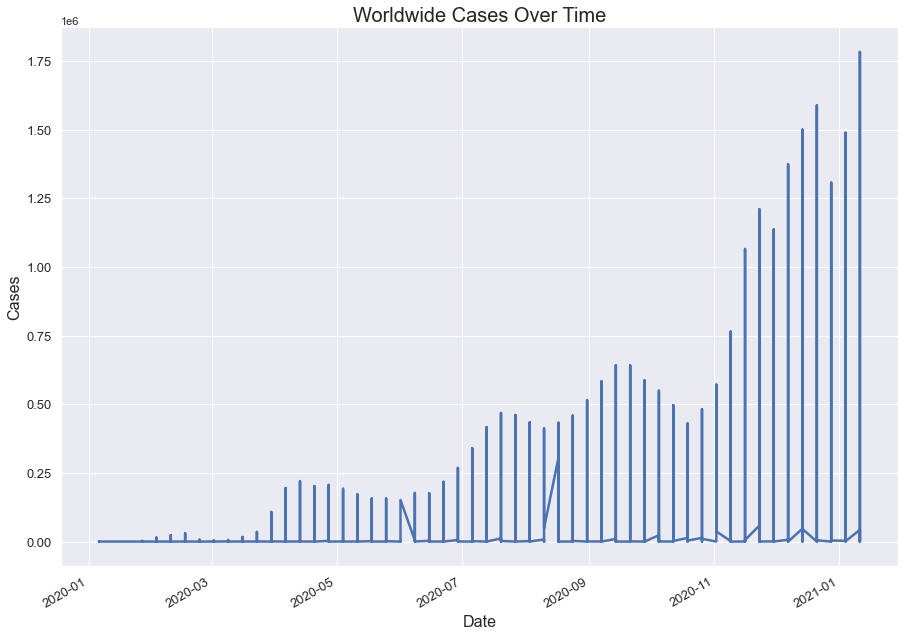

In [42]:
#Look at world wide incidence rate over time
world_daily = covid.set_index('Date')
sns.set_color_codes("colorblind")
sns.set(rc={'figure.figsize':(15, 11)})
world_daily['cases_weekly'].plot(linewidth = 2.5)


plt.title('Worldwide Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

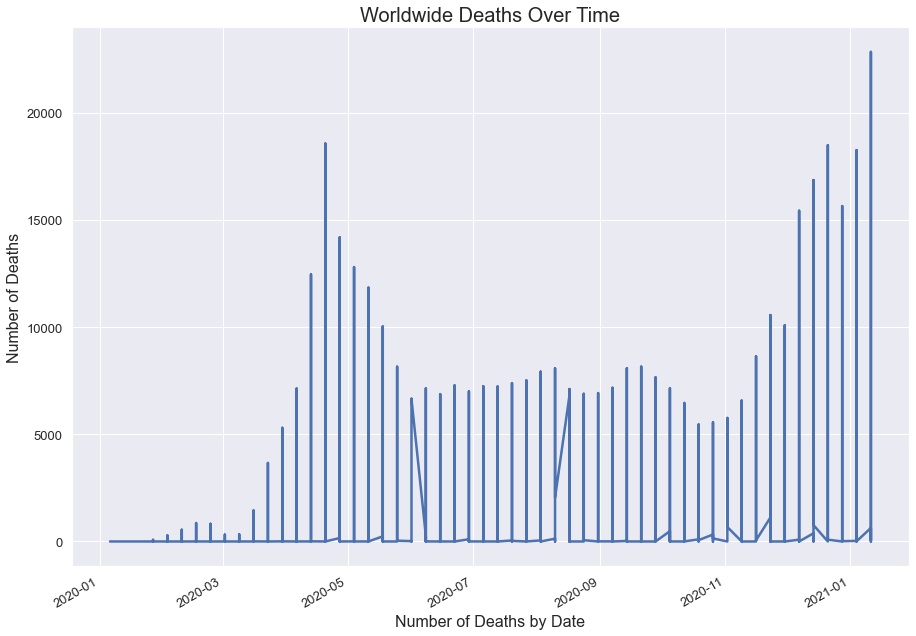

In [43]:
#Look at worldwide fatality rate over time
sns.set(rc={'figure.figsize':(15,11)})
world_daily['deaths_weekly'].plot(linewidth = 2.5)


plt.title('Worldwide Deaths Over Time', fontsize = 20)
plt.xlabel('Number of Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

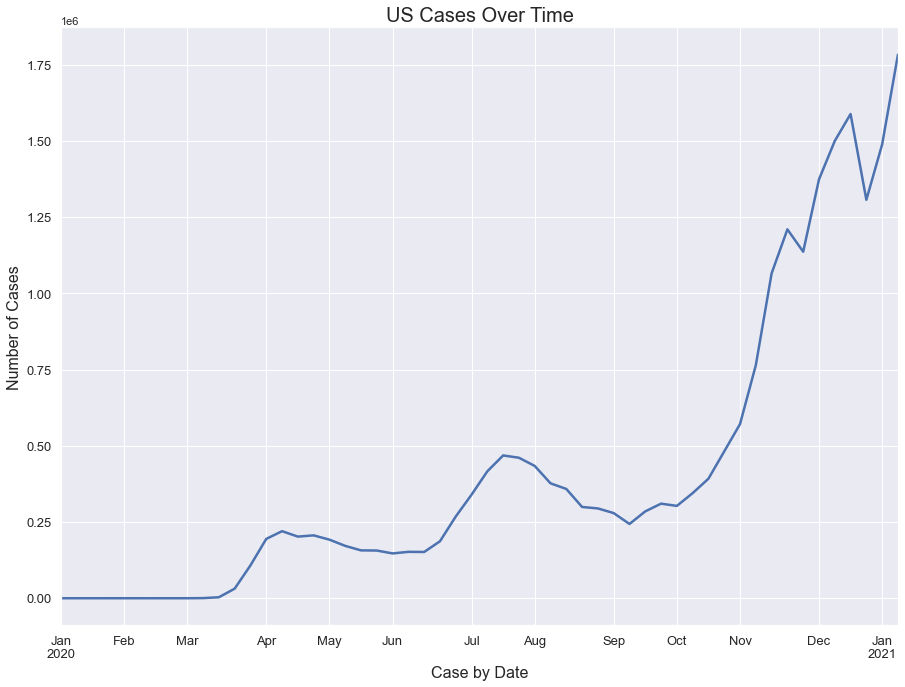

In [44]:
#Look at USA incidence rate over time
UScovid19_df = covid[covid["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['cases_weekly'].plot(linewidth = 2.5)

plt.title('US Cases Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

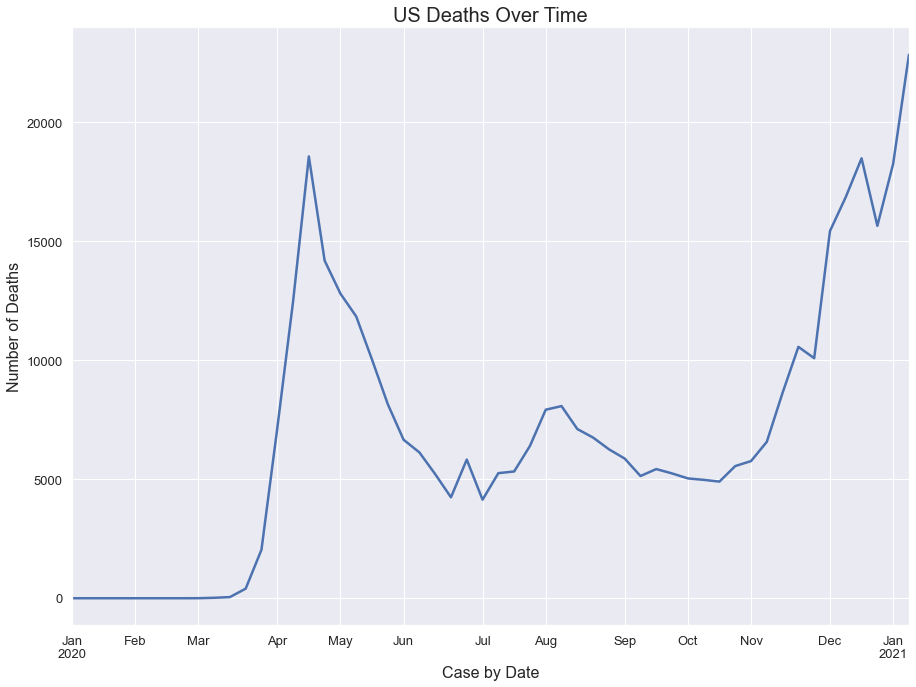

In [45]:
#Look at the USA fatality rate over time
UScovid19_df = covid[covid["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['deaths_weekly'].plot(linewidth = 2.5)

plt.title('US Deaths Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

In [46]:
#covid['countriesAndTerritories'].unique()

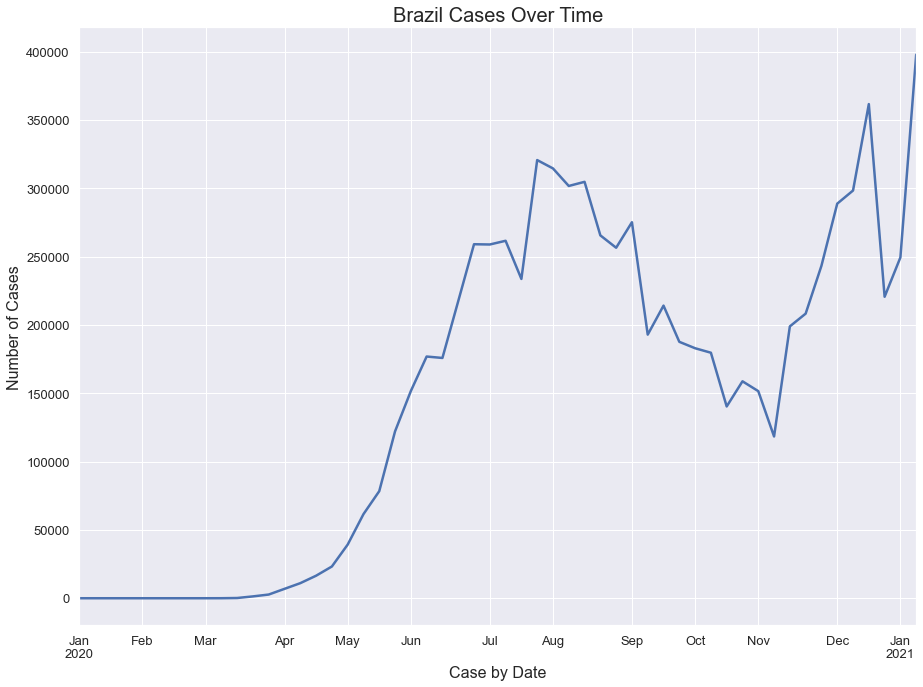

In [47]:
##Look at the Cases and Deaths over time for any user selected country:
####country = input("Select a Country: ")
#Set country to Brazil so the code won't hit a block here when I run all cells:
country = 'Brazil'
covid19_df = covid[covid["countriesAndTerritories"] == "{}".format(country)].reset_index()
country_weekly = covid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
country_weekly['cases_weekly'].plot(linewidth = 2.5)

plt.title('{} Cases Over Time'.format(country), fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

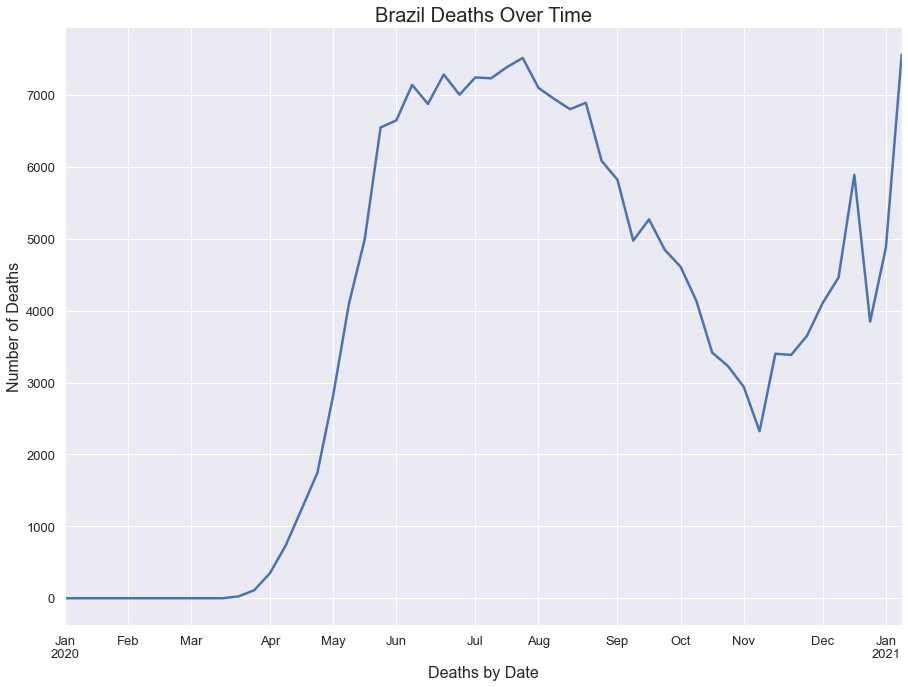

In [48]:
covid19_df = covid[covid["countriesAndTerritories"] == "{}".format(country)].reset_index()
country_weekly = covid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
country_weekly['deaths_weekly'].plot(linewidth = 2.5)

plt.title('{} Deaths Over Time'.format(country), fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

I want to also look at how the New Cases over 14 Day period per 100K population is changing in individual countries. This will indicate how well the country is controlling covid:

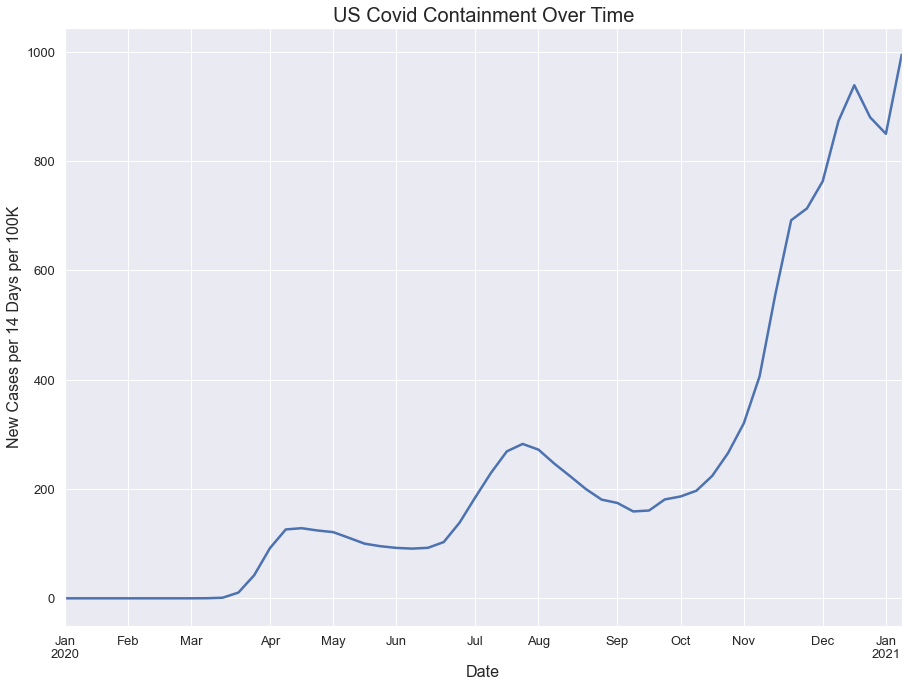

In [49]:
UScovid19_df = covid[covid["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['New Cases 14Day per 100K'].plot(linewidth = 2.5)

plt.title('US Covid Containment Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('New Cases per 14 Days per 100K', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

Will also look at this time series metric for an arbitrary country as well:

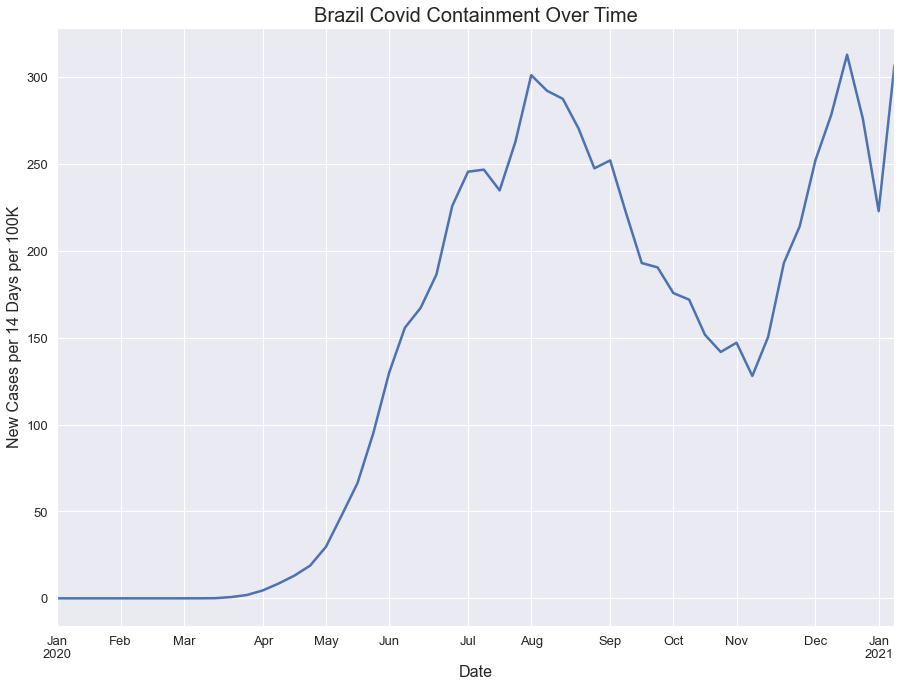

In [50]:
####country = input("Select a Country: ")
##Use country as Brazil again just so code doesn't hit roadblock when running all:
covid19_df = covid[covid["countriesAndTerritories"] == "{}".format(country)].reset_index()
country_14day = covid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
country_14day['New Cases 14Day per 100K'].plot(linewidth = 2.5)

plt.title('{} Covid Containment Over Time'.format(country), fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('New Cases per 14 Days per 100K', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

### Provided functions

In [51]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')
    plt.show()
    plt.close()

np.set_printoptions(precision=3)

The current dataframe format is nice for looking at time series data, however, I will now aggregate the data based on country. This will allow me to look at cummulative Covid-19 cases and deaths by country and allow for more in depth look at the data to understand the Covid-19 incidence rate, fatality rate, and provide a different data perspective than that I have taken thus far:

In [52]:
#Aggregate the data by country for cummulative cases, deaths, and population by country
covid_agg = covid.groupby("countriesAndTerritories").agg({'cases_weekly':np.sum, 'deaths_weekly':np.sum,
                                                         'popData2019':np.min})
covid_agg.reset_index(inplace=True)
covid_agg.rename(columns = {'countriesAndTerritories':'Country','cases_weekly':'Cases','deaths_weekly':'Deaths','popData2019':'Population'}, inplace = True)
covid_agg.columns

Index(['Country', 'Cases', 'Deaths', 'Population'], dtype='object')

In [53]:
#Look at the head of this new dataset
covid_agg.head()

Country   Cases  Deaths  Population
0  Afghanistan   53584    2301  38041757.0
1      Albania   63595    1241   2862427.0
2      Algeria  102144    2807  43053054.0
3      Andorra    8682      86     76177.0
4       Angola   18193     416  31825299.0

With this new aggregated data set, I think it will be good to start exploring the data by looking at descriptive statistics:

In [54]:
covid_agg.describe().transpose().round(1)

count        mean          std    min       25%        50%  \
Cases       214.0    419684.4    1825208.4    1.0    2569.5    25299.0   
Deaths      214.0      9080.2      34016.4    0.0      44.2      325.5   
Population  214.0  35842812.9  140257122.2  815.0  799804.0  6661478.0   

                   75%           max  
Cases         182059.0  2.242301e+07  
Deaths          3106.0  3.744420e+05  
Population  24845870.2  1.433784e+09

These summary statistics are very telling about the world wide Covid-19 pandemic. First, on average, each country has over 400,000 cases of Covid-19 and over 9,000 deaths due to Covid-19. This is a sobering reality about how impactful this disease has had on the globe. Not all countries are being affected similarly, however. The standard deviations for cummulative Cases and Deaths are very large compared to the mean values. Looking at the percentiles, it is clear both of these variables will be very right skewed as some countries are struggling to mitigate the spread of Covid-19 and its impact.

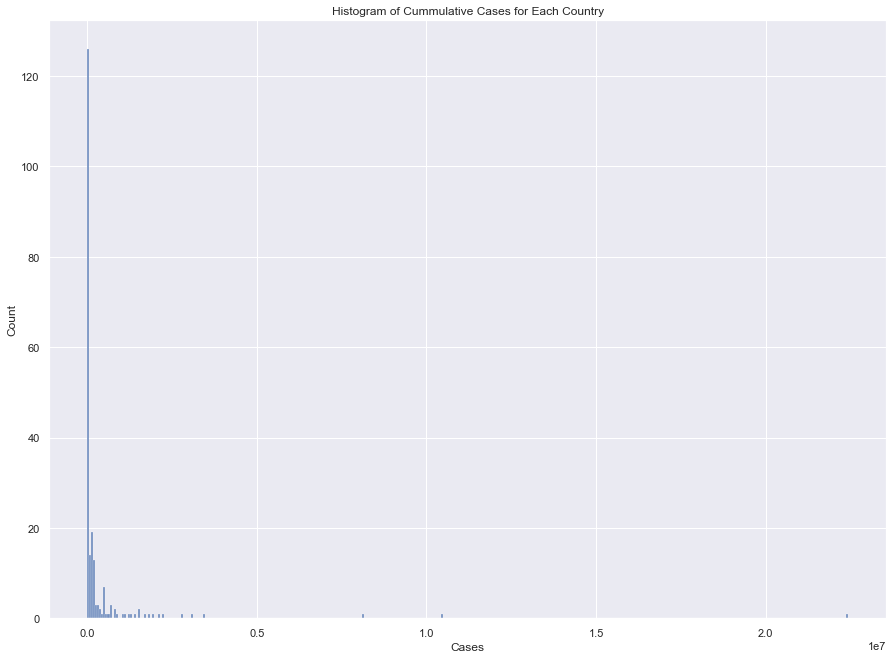

In [55]:
#Look at a histogram of the Cases data:
sns.histplot(data = covid_agg, x = "Cases")
plt.title('Histogram of Cummulative Cases for Each Country')
plt.show()

This histogram allows for a clear visual that the Cases histogram is heavily right skewed with some countries being affected to a much greater magnitude than others when it comes to controlling the spread of Covid-19.

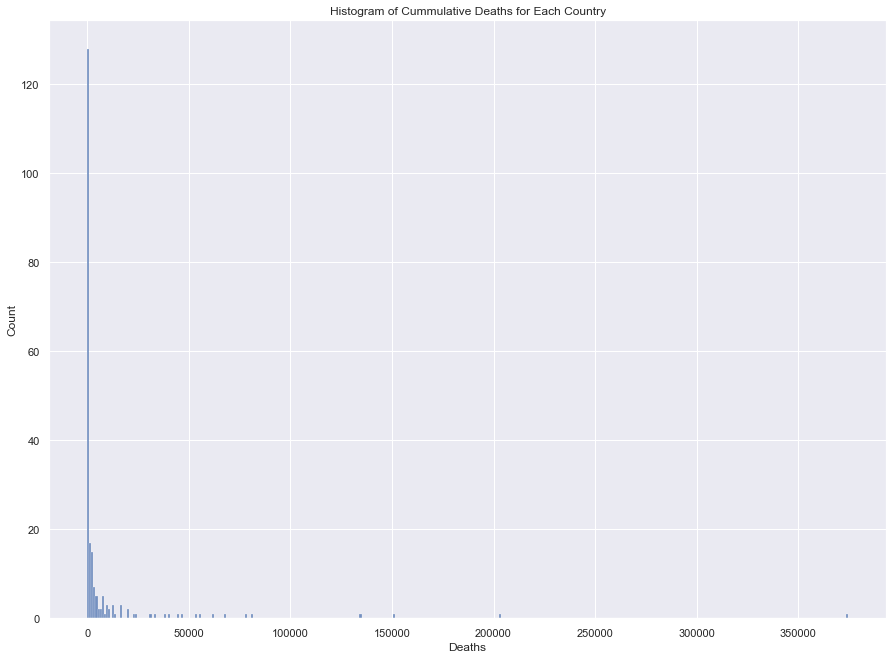

In [56]:
#Now look at the Deaths data:
sns.histplot(data = covid_agg, x = "Deaths")
plt.title('Histogram of Cummulative Deaths for Each Country')
plt.show()

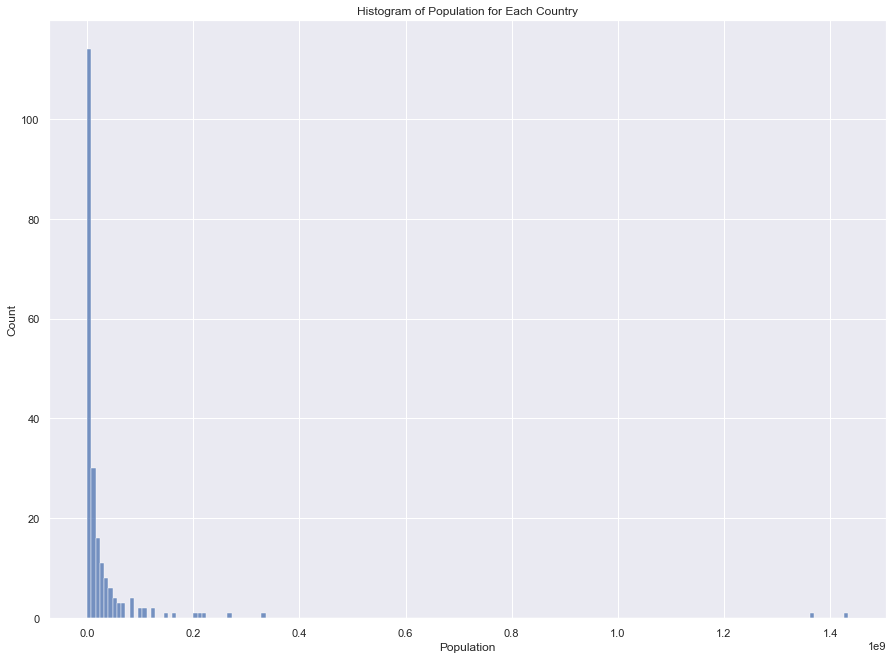

In [57]:
#Look at the population histogram
sns.histplot(data = covid_agg, x = "Population")
plt.title('Histogram of Population for Each Country')
plt.show()

Just like the Cases histogram, the cummulative Deaths histogram and Population histogram are also heavily right skewed.

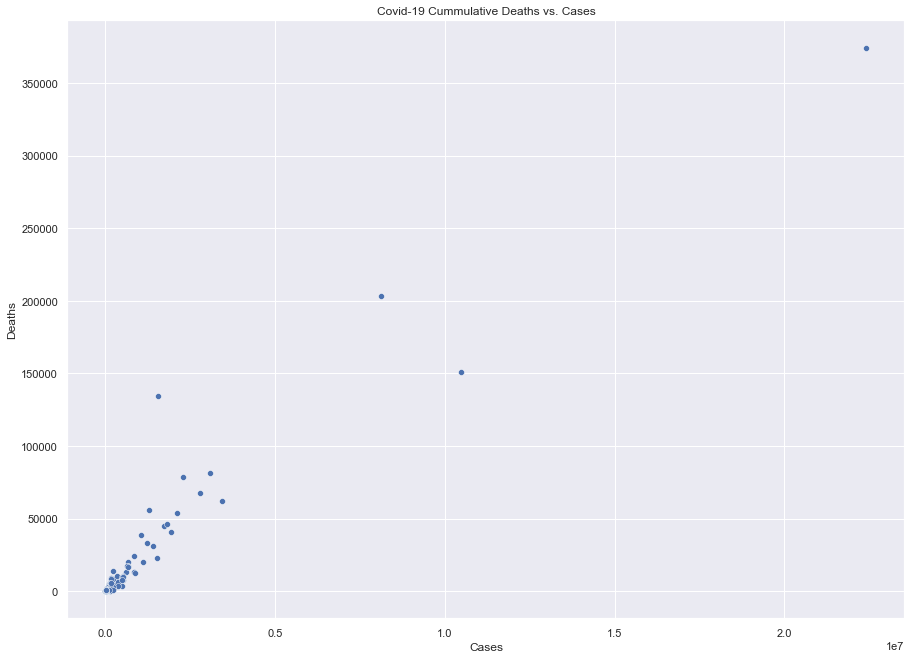

In [58]:
#Let's look at a bivariate distribution / scatterplot to see how well Cases and Deaths are correlated:
sns.scatterplot(data = covid_agg, x = "Cases", y = "Deaths")
plt.title("Covid-19 Cummulative Deaths vs. Cases")
plt.show()

There appears to be a strong correlation between Cases and Deaths. Let's see if there are any other correlations in the data by examing a pair plot and correlation heat map:

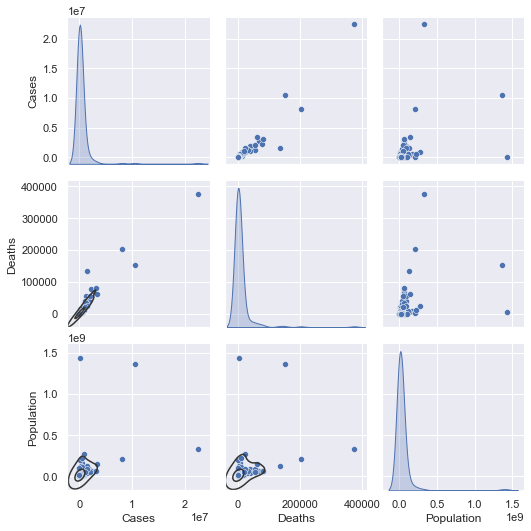

In [59]:
#Look at pair plot first
sns.set(rc={'figure.figsize':(5,5)})
g = sns.pairplot(covid_agg, diag_kind = "kde")
g.map_lower(sns.kdeplot, levels = 3, color = "0.2")
plt.show()

<Figure size 360x360 with 0 Axes>

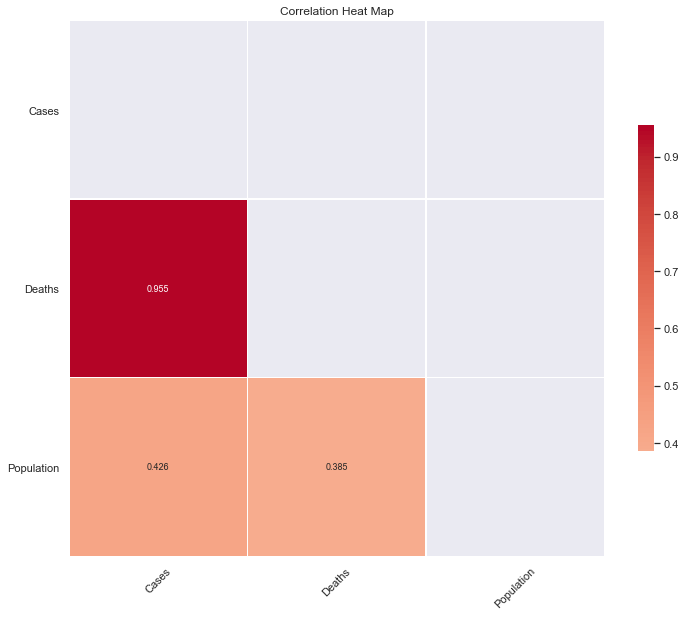

In [60]:
#Look at the correlation Heat Map
corr_chart(covid_agg)
plt.show()

The pairplot and correlation heat map confirm the observation that the number of cases and the number of deaths are highly correlated. Also, the country population appears to be slightly correlated to both factors as well. This warrants a closer look:

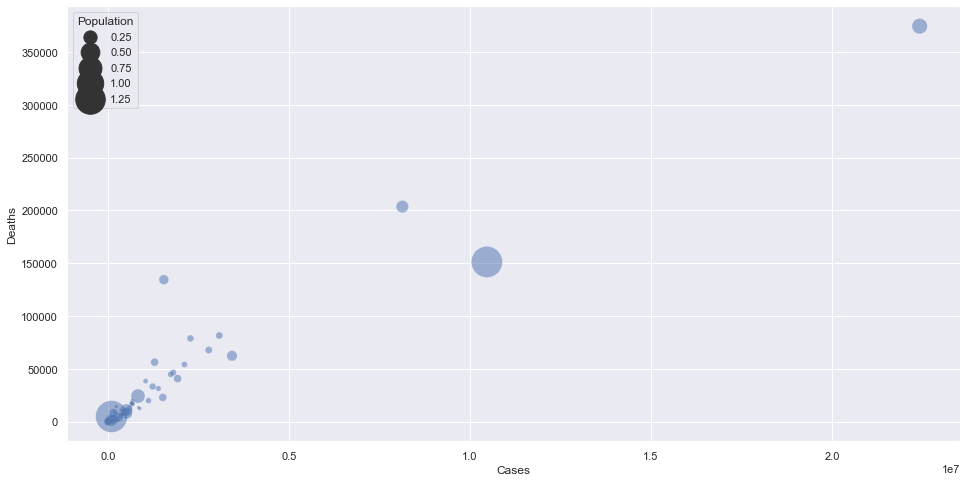

In [61]:
#Look at a bubble chart of Deaths vs. Cases with the size of the bubble equal to the country's population:
sns.set(rc={'figure.figsize':(16,8)})
sns.scatterplot(data=covid_agg, x = "Cases", y = "Deaths", size = "Population", alpha = 0.5, sizes = (1,1000),
               legend = 'brief')
plt.show()

It appears that smaller countries (lower populations) have lower case counts & death counts, but this may simply be due to the fact that their population is small. So I will undergo some feature engineering and look at Cases and Death rates per million persons of a countries population:

In [62]:
#Feature Engineering
covid_agg['Cases_per_1M'] = (covid_agg['Cases']/covid_agg['Population'])*1000000
covid_agg['Deaths_per_1M'] = (covid_agg['Deaths']/covid_agg['Population'])*1000000

In [63]:
#Will also look at the Deaths per Covid-19 cases to get a differnt perspective on the fatality rate for each country
covid_agg['Deaths_per_Cases'] = (covid_agg['Deaths']/covid_agg['Cases'])*100

These new features will hopefully allow us to look at the Covid-19 Cases and Deaths data again, but this time control for the populations. I.e. larger populations won't dwarf smaller populations in case counts just because they have more citizens.

In [64]:
#Look at the head of this data set with new features:
covid_agg.head()

Country   Cases  Deaths  Population   Cases_per_1M  Deaths_per_1M  \
0  Afghanistan   53584    2301  38041757.0    1408.557444      60.486165   
1      Albania   63595    1241   2862427.0   22217.160473     433.548174   
2      Algeria  102144    2807  43053054.0    2372.514619      65.198627   
3      Andorra    8682      86     76177.0  113971.408693    1128.949683   
4       Angola   18193     416  31825299.0     571.652131      13.071362   

   Deaths_per_Cases  
0          4.294192  
1          1.951411  
2          2.748081  
3          0.990555  
4          2.286594

In [65]:
#Look at the descriptive statistics of the three new features:
covid_agg.describe().transpose().round(1)

count        mean          std    min       25%        50%  \
Cases             214.0    419684.4    1825208.4    1.0    2569.5    25299.0   
Deaths            214.0      9080.2      34016.4    0.0      44.2      325.5   
Population        214.0  35842812.9  140257122.2  815.0  799804.0  6661478.0   
Cases_per_1M      214.0     18876.7      24871.8    3.3    1162.0     8371.8   
Deaths_per_1M     214.0       313.6        414.7    0.0      13.3       90.2   
Deaths_per_Cases  214.0         1.9          2.4    0.0       0.8        1.6   

                         75%           max  
Cases               182059.0  2.242301e+07  
Deaths                3106.0  3.744420e+05  
Population        24845870.2  1.433784e+09  
Cases_per_1M         30449.4  1.899757e+05  
Deaths_per_1M          474.0  1.857600e+03  
Deaths_per_Cases         2.5  2.900000e+01

The new features Cases_per_1M and Deaths_per_1M are less skewed compared to their magnitude counterparts Cases and Deaths. The mean and std for each new feature have the same magnitude indicating improvement in skew. However, a look at the percentiles for these two new features does confirm that some countries are clearly handling Covid better than others. The Deaths_per_Cases indicates that on average 1.9% of people who contract Covid-19 will die from it. However, this variable does look to be considerably right skewed as well. It will be worth examinging these new features more:

In [66]:
#Histogram of Cases_per_1M
sns.histplot(data = covid_agg, x = "Cases_per_1M")
plt.title("Histogram of Covid-19 Cases per 1M Population")
plt.show()

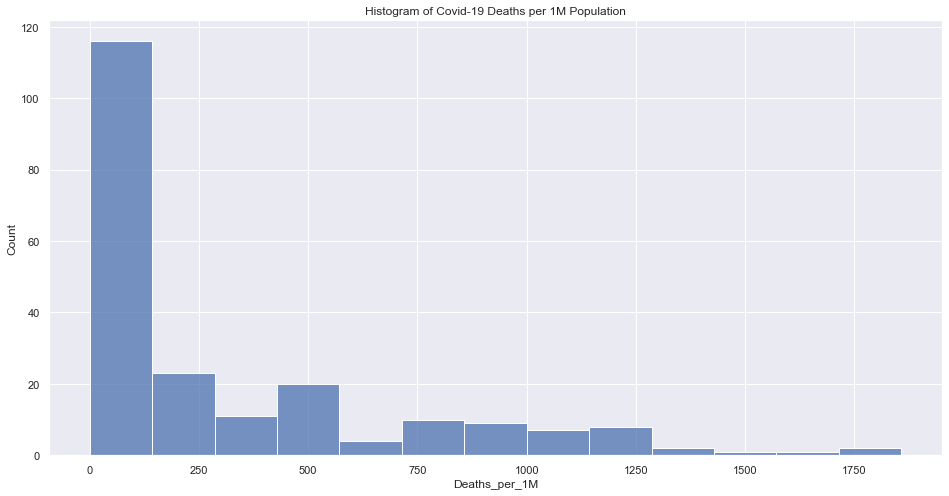

In [67]:
#Histogram of Deaths_per_1M
sns.histplot(data = covid_agg, x = "Deaths_per_1M")
plt.title("Histogram of Covid-19 Deaths per 1M Population")
plt.show()

In [68]:
#Histogram of Deaths_per_Cases in percentage
sns.histplot(data = covid_agg, x = "Deaths_per_Cases")
plt.title("Histogram of Covid-19 Deaths per Cases")
plt.show()

Based on the Histograms of Cases_per_1M and Deaths_per_1M, it is clear that these variables are far less skewed compared to the Cases and Deaths variables. They are still heavily right skewed, but to a less dramatic fashion.

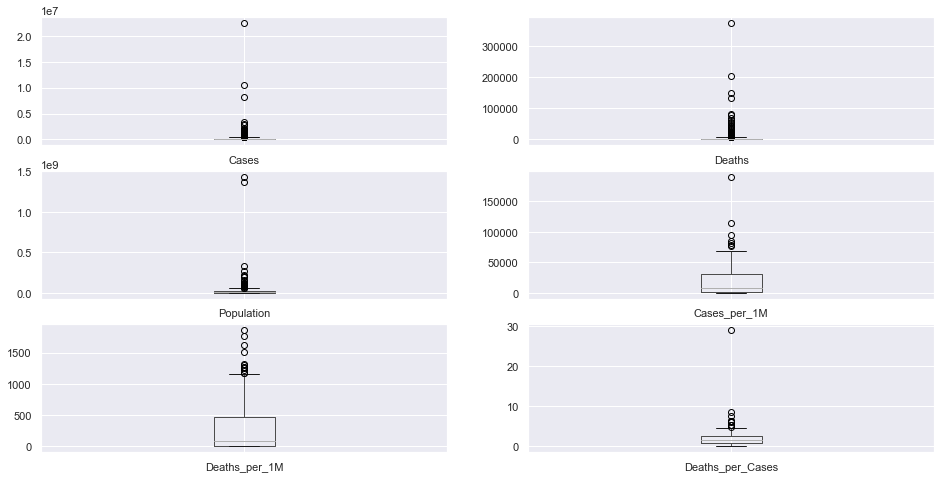

In [69]:
#Look at boxplots for each of the features to clearly indicate the outliers present:
fig, axs = plt.subplots(3,2)
covid_agg.boxplot(column = ['Cases'], ax = axs[0,0])
covid_agg.boxplot(column = ['Deaths'], ax = axs[0,1])
covid_agg.boxplot(column = ['Population'], ax = axs[1,0])
covid_agg.boxplot(column = ['Cases_per_1M'], ax = axs[1,1])
covid_agg.boxplot(column = ['Deaths_per_1M'], ax = axs[2,0])
covid_agg.boxplot(column = ['Deaths_per_Cases'], ax = axs[2,1])
plt.show()

In [70]:
import scipy

In [71]:
#Skewness has been very present visually, let's quantify it:
print("Skewness for Cases: ", round(scipy.stats.skew(covid_agg['Cases']),2))
print("Skewness for Deaths: ", round(scipy.stats.skew(covid_agg['Deaths']),2))
print("Skewness for Cases_per_1M: ", round(scipy.stats.skew(covid_agg['Cases_per_1M']),2))
print("Skewness for Deaths_per_1M: ", round(scipy.stats.skew(covid_agg['Deaths_per_1M']),2))
print("Skewness for Deaths_per_Cases: ", round(scipy.stats.skew(covid_agg['Deaths_per_Cases']),2))
print("Skewness for Population: ", round(scipy.stats.skew(covid_agg['Population']),2))

Skewness for Cases:  9.44
Skewness for Deaths:  7.45
Skewness for Cases_per_1M:  2.46
Skewness for Deaths_per_1M:  1.47
Skewness for Deaths_per_Cases:  7.51
Skewness for Population:  8.77


Calculating the Fisher-Pearson coefficient of skewness for Cases, Deaths, Cases_per_1M and Deaths_per_1M confirms the observations above with quantitative data: The new features are far less skewed than the original.

In [72]:
#Look at the new features and their pairplots:
sns.pairplot(covid_agg, 
             x_vars = ["Cases","Deaths","Population","Cases_per_1M","Deaths_per_1M"],
            y_vars = ['Cases_per_1M','Deaths_per_1M','Deaths_per_Cases'])
plt.show()

<Figure size 1152x576 with 0 Axes>

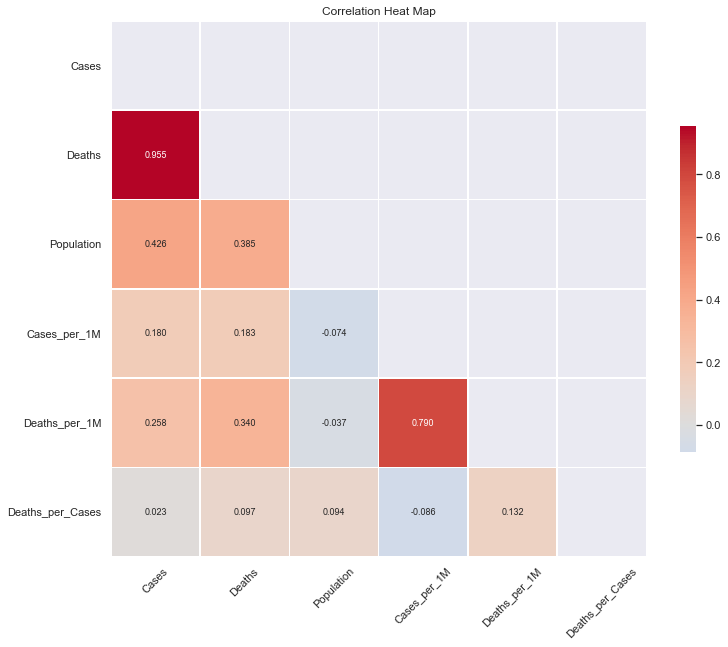

In [73]:
#Also re-examine the correlation heat map following feature engineering
corr_chart(covid_agg)
plt.show()

The Deaths_per_Cases feature does not appear to be strongly correlated with any other feature. That is most likely due to the fact that other attributes such as government policy, population genetics and risk factors, etc would better predict deaths per cases for a given country.

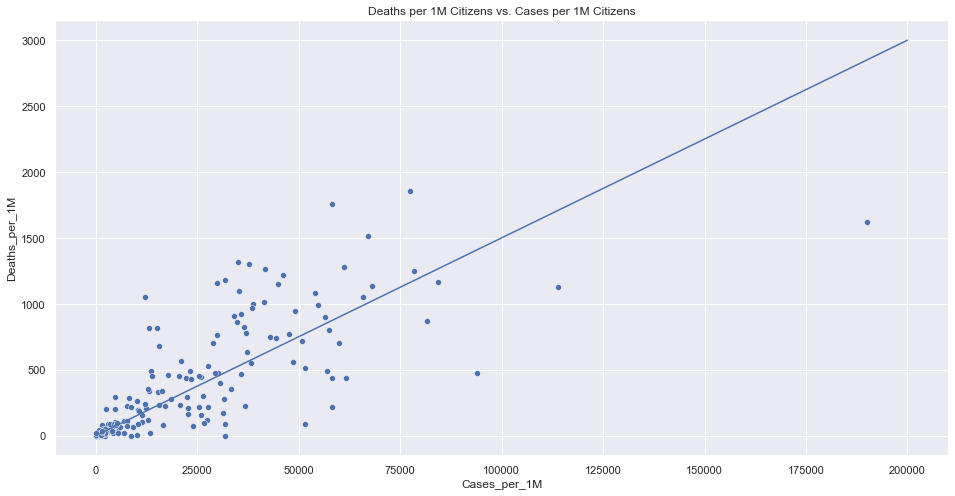

In [74]:
#Look at scatter plot of Deaths_per_1M vs. Cases_per_1M, consider bivariate distribution:
sns.scatterplot(data = covid_agg, x = "Cases_per_1M", y = "Deaths_per_1M")
sns.lineplot(x = [0,200000], y = [0,3000])
#Add in the line at 1.5% fatality rate as a point of reference
plt.title("Deaths per 1M Citizens vs. Cases per 1M Citizens")
plt.show()

The scatterplot of Deaths_per_1M vs. Cases_per_1M is less correlated compared to Deaths vs. Cases, but still shows strong linear correlation nonetheless. In general, the higher the case count the higher amount of deaths there are. But with the population controlled features, it is clear that some countries have a higher fatality rate than others. The line in the plot above represents a fatality rate of 1.5%. Meaning 1.5% of people who contract Covid are expected to die from it. This line is a good estimate of a least squares fitting line indicating 1.5% fatality rate is close to the expected fatality rate for Covid-19 (The calculated average above was 1.9%). However, some data points are far below this line and some far above indicating some countries have a higher propensity to survive Covid-19 and others have a higher propensity of succumbing to the virus. 

In [75]:
#Repeat the above graph, but consider the impact of the country population:
sns.scatterplot(data = covid_agg, x = "Cases_per_1M", y = "Deaths_per_1M", 
               size = "Population", alpha = 0.75, sizes = (10,1000), legend = False)
sns.lineplot(x = [0,200000], y = [0,3000])
plt.title("Deaths per 1M Citizens vs. Cases per 1M Citizens: Bubble Size scaled to Population")
plt.plot()

[]

Adding Population to the bubble size for the Deaths_per_1M vs. Cases_per_1M graphic shows that smaller countries appear to have lower fatality rates to Covid-19 compared to larger countries. This may be due to hospital infrastructure in large countries being overwhelmed with the volume of cases and not being able to effectively treat the sick.

Another thing I think is worth looking at is to sort the covid_agg dataframe based on the features just to start putting the Country name to some of these key data points in the visualizations above:

In [76]:
#First, sort by population and look at top 10 countries:
covid_agg_sort = covid_agg
covid_agg_sort.sort_values(by = 'Population', ascending = False).head(10)

Country     Cases  Deaths    Population  Cases_per_1M  \
42                      China     96824    4787  1.433784e+09     67.530410   
92                      India  10466595  151160  1.366418e+09   7659.879238   
204  United_States_of_America  22423006  374442  3.290649e+08  68141.588002   
93                  Indonesia    828026   24129  2.706256e+08   3059.673959   
149                  Pakistan    504293   10676  2.165653e+08   2328.595396   
27                     Brazil   8131612  203580  2.110495e+08  38529.403140   
144                   Nigeria    100087    1358  2.009636e+08    498.035458   
15                 Bangladesh    522453    7781  1.630462e+08   3204.325440   
161                    Russia   3425269   62273  1.458723e+08  23481.291097   
127                    Mexico   1541633  134368  1.275755e+08  12084.080796   

     Deaths_per_1M  Deaths_per_Cases  
42        3.338718          4.944022  
92      110.625026          1.444214  
204    1137.897055          1.669901  
93       89.160090          2.914039  
149      49.296906          2.117023  
27      964.607742          2.503563  
144       6.757443          1.356820  
15       47.722678          1.489321  
161     426.900906          1.818047  
127    1053.242742          8.715952

In [77]:
#Next, look at top countries by cases:
covid_agg.sort_values(by = 'Cases', ascending = False).head(10)

Country     Cases  Deaths    Population  Cases_per_1M  \
204  United_States_of_America  22423006  374442  3.290649e+08  68141.588002   
92                      India  10466595  151160  1.366418e+09   7659.879238   
27                     Brazil   8131612  203580  2.110495e+08  38529.403140   
161                    Russia   3425269   62273  1.458723e+08  23481.291097   
201            United_Kingdom   3072349   81431  6.664711e+07  46098.756687   
70                     France   2783256   67750  6.701288e+07  41533.148186   
99                      Italy   2276491   78755  6.035955e+07  37715.508993   
182                     Spain   2111782   54025  4.693706e+07  44991.782613   
75                    Germany   1921024   40686  8.301921e+07  23139.511091   
43                   Colombia   1801903   46451  5.033944e+07  35795.052401   

     Deaths_per_1M  Deaths_per_Cases  
204    1137.897055          1.669901  
92      110.625026          1.444214  
27      964.607742          2.503563  
161     426.900906          1.818047  
201    1221.823385          2.650448  
70     1010.999631          2.434199  
99     1304.764618          3.459491  
182    1151.009458          2.558266  
75      490.079327          2.117933  
43      922.755542          2.577886

In [78]:
#Next, look at top countries by deaths:
covid_agg.sort_values(by = 'Deaths', ascending = False).head(10)

Country     Cases  Deaths    Population  Cases_per_1M  \
204  United_States_of_America  22423006  374442  3.290649e+08  68141.588002   
27                     Brazil   8131612  203580  2.110495e+08  38529.403140   
92                      India  10466595  151160  1.366418e+09   7659.879238   
127                    Mexico   1541633  134368  1.275755e+08  12084.080796   
201            United_Kingdom   3072349   81431  6.664711e+07  46098.756687   
99                      Italy   2276491   78755  6.035955e+07  37715.508993   
70                     France   2783256   67750  6.701288e+07  41533.148186   
161                    Russia   3425269   62273  1.458723e+08  23481.291097   
94                       Iran   1286406   56171  8.291389e+07  15514.963216   
182                     Spain   2111782   54025  4.693706e+07  44991.782613   

     Deaths_per_1M  Deaths_per_Cases  
204    1137.897055          1.669901  
27      964.607742          2.503563  
92      110.625026          1.444214  
127    1053.242742          8.715952  
201    1221.823385          2.650448  
99     1304.764618          3.459491  
70     1010.999631          2.434199  
161     426.900906          1.818047  
94      677.461858          4.366506  
182    1151.009458          2.558266

In [79]:
#Next, Look at top countries by Cases per 1M:
covid_agg.sort_values(by = 'Cases_per_1M', ascending = False).head(10)

Country     Cases  Deaths  \
37   Cases_on_an_international_conveyance_Japan       705       6   
3                                       Andorra      8682      86   
77                                    Gibraltar      3170      16   
132                                  Montenegro     52431     725   
117                                  Luxembourg     50142     533   
52                                      Czechia    835454   13272   
166                                  San_Marino      2667      64   
204                    United_States_of_America  22423006  374442   
176                                    Slovenia    139713    3147   
151                                      Panama    279196    4455   

      Population   Cases_per_1M  Deaths_per_1M  Deaths_per_Cases  
37        3711.0  189975.747777    1616.814875          0.851064  
3        76177.0  113971.408693    1128.949683          0.990555  
77       33706.0   94048.537352     474.692933          0.504732  
132     622182.0   84269.554568    1165.253897          1.382770  
117     613894.0   81678.595979     868.228065          1.062981  
52    10649800.0   78447.858176    1246.220586          1.588597  
166      34453.0   77409.804661    1857.603111          2.399700  
204  329064917.0   68141.588002    1137.897055          1.669901  
176    2080908.0   67140.402171    1512.320583          2.252475  
151    4246440.0   65748.250299    1049.114081          1.595653

In [80]:
#Lastly, look at top countries by deaths per 1M:
covid_agg.sort_values(by = 'Deaths_per_1M', ascending = False).head(10)

Country    Cases  Deaths  Population  \
166                                  San_Marino     2667      64     34453.0   
18                                      Belgium   665984   20142  11455519.0   
37   Cases_on_an_international_conveyance_Japan      705       6      3711.0   
176                                    Slovenia   139713    3147   2080908.0   
25                       Bosnia_and_Herzegovina   115758    4358   3300998.0   
99                                        Italy  2276491   78755  60359546.0   
115                               Liechtenstein     2346      49     38378.0   
145                             North_Macedonia    86494    2622   2077132.0   
52                                      Czechia   835454   13272  10649800.0   
201                              United_Kingdom  3072349   81431  66647112.0   

      Cases_per_1M  Deaths_per_1M  Deaths_per_Cases  
166   77409.804661    1857.603111          2.399700  
18    58136.519175    1758.279132          3.024397  
37   189975.747777    1616.814875          0.851064  
176   67140.402171    1512.320583          2.252475  
25    35067.576533    1320.206798          3.764751  
99    37715.508993    1304.764618          3.459491  
115   61128.771692    1276.773151          2.088662  
145   41641.070476    1262.317465          3.031424  
52    78447.858176    1246.220586          1.588597  
201   46098.756687    1221.823385          2.650448

In [81]:
#Lastly, look at top countries by deaths per Cases:
covid_agg.sort_values(by = 'Deaths_per_Cases', ascending = False).head(10)

Country    Cases  Deaths    Population  Cases_per_1M  Deaths_per_1M  \
211        Yemen     2108     612  2.916192e+07     72.286045      20.986271   
127       Mexico  1541633  134368  1.275755e+08  12084.080796    1053.242742   
133   Montserrat       13       1  4.991000e+03   2604.688439     200.360649   
97   Isle_of_Man      396      25  8.458900e+04   4681.459764     295.546702   
184        Sudan    23316    1468  4.281324e+07    544.597924      34.288461   
188        Syria    12364     774  1.707013e+07    724.306057      45.342356   
58       Ecuador   229234   14184  1.737366e+07  13194.343597     816.408428   
59         Egypt   149792    8197  1.003881e+08   1492.129404      81.653124   
23       Bolivia   173896    9376  1.151310e+07  15104.183043     814.376525   
42         China    96824    4787  1.433784e+09     67.530410       3.338718   

     Deaths_per_Cases  
211         29.032258  
127          8.715952  
133          7.692308  
97           6.313131  
184          6.296106  
188          6.260110  
58           6.187564  
59           5.472255  
23           5.391728  
42           4.944022

These rankings confirm that large countries are going to have higher overall cases and death counts, but the small countries that have an outbreak are going to score highly on a per million bases. However, because those overall counts are still relatively low, it is probably likely those countries can address the infected better leading to lower fatality rates. 

In [82]:
#Look at worldwide values for perspective:
print('Covid-19 Cases World Wide: {:,}'.format(covid_agg['Cases'].sum()))
print('Covid-19 Deaths World Wide: {:,}'.format(covid_agg['Deaths'].sum()))
print('Covid-19 Population World Wide: {:,}'.format(covid_agg['Population'].sum()))

Covid-19 Cases World Wide: 89,812,468
Covid-19 Deaths World Wide: 1,943,157
Covid-19 Population World Wide: 7,670,361,969.0


#### Data Scaling & Comparisons






Because of the significance of cases, I want to look at the Cases_per_1M variable to see how the min-max and standard scalings affect this variable. Also, because this variable is far less skewed compared to Cases, I am hoping the preprocessing and scaling steps have a greater impact due to less outliers:

In [83]:
#First, re-print histogram of this variable:
sns.histplot(data=covid_agg, x = "Cases_per_1M")
plt.show()

In [84]:
#Load in the transformation functions from sklearn.preprocessing:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Transformers need array inputs and cannot accept strings. Will re-index my dataframe to have the country as index
covid_transform = covid_agg.set_index('Country')
covid_transform.head()

Cases  Deaths  Population   Cases_per_1M  Deaths_per_1M  \
Country                                                                 
Afghanistan   53584    2301  38041757.0    1408.557444      60.486165   
Albania       63595    1241   2862427.0   22217.160473     433.548174   
Algeria      102144    2807  43053054.0    2372.514619      65.198627   
Andorra        8682      86     76177.0  113971.408693    1128.949683   
Angola        18193     416  31825299.0     571.652131      13.071362   

             Deaths_per_Cases  
Country                        
Afghanistan          4.294192  
Albania              1.951411  
Algeria              2.748081  
Andorra              0.990555  
Angola               2.286594

In [85]:
#The transformer can easily transform an array as it would a vector, so will transform all variables at once:
scaler = StandardScaler().fit_transform(covid_transform)
scaled_data = pd.DataFrame({'Cases':scaler[:,0],'Deaths':scaler[:,1],
                           'Population':scaler[:,2],'Cases_per_1M':scaler[:,3],'Deaths_per_1M':scaler[:,4],
                           'Deaths_per_Cases':scaler[:,5]})
scaled_data.head()

Cases    Deaths  Population  Cases_per_1M  Deaths_per_1M  \
0 -0.201050 -0.199758    0.015715     -0.703973      -0.611735   
1 -0.195553 -0.230993   -0.235694      0.134622       0.290068   
2 -0.174383 -0.184848    0.051528     -0.665125      -0.600343   
3 -0.225709 -0.265027   -0.255606      3.832356       1.971062   
4 -0.220486 -0.255303   -0.028711     -0.737701      -0.726350   

   Deaths_per_Cases  
0          1.009229  
1          0.010899  
2          0.350384  
3         -0.398551  
4          0.153730

In [86]:
#Look at the impact of the transformation on the Cases_per_1M feature:
f, ax = plt.subplots(2)
sns.histplot(data=covid_agg, x = "Cases_per_1M", ax = ax[0])
sns.histplot(data=scaled_data, x = "Cases_per_1M", ax = ax[1])
plt.show()

In [87]:
#Look specifically at the original descriptive statistics:
covid_agg.Cases_per_1M.describe().round(1)

count       214.0
mean      18876.7
std       24871.8
min           3.3
25%        1162.0
50%        8371.8
75%       30449.4
max      189975.7
Name: Cases_per_1M, dtype: float64

In [88]:
#Look specifically at the transformed descriptive statistics:
scaled_data.Cases_per_1M.describe().round(1)

count    214.0
mean       0.0
std        1.0
min       -0.8
25%       -0.7
50%       -0.4
75%        0.5
max        6.9
Name: Cases_per_1M, dtype: float64

Using the StandardScaler, it is clear that this transformer retains the general distribution shape. This can be seen by comparing the histograms of the pre and post scaled Cases_per_1M data. The StandardScaler transformer ensures that the dataset has a mean of 0 and a variance of 1 (std = 1) much like a standard normal curve. 

In [89]:
#Now look at the min-max transformer:
minmax = MinMaxScaler().fit_transform(covid_transform)
minmax_data = pd.DataFrame({'Cases':minmax[:,0],'Deaths':minmax[:,1],
                           'Population':minmax[:,2],'Cases_per_1M':minmax[:,3],'Deaths_per_1M':minmax[:,4],
                           'Deaths_per_Cases':minmax[:,5]})
minmax_data.head()

Cases    Deaths  Population  Cases_per_1M  Deaths_per_1M  \
0  0.002390  0.006145    0.026532      0.007397       0.032561   
1  0.002836  0.003314    0.001996      0.116932       0.233391   
2  0.004555  0.007496    0.030027      0.012471       0.035098   
3  0.000387  0.000230    0.000053      0.599919       0.607745   
4  0.000811  0.001111    0.022196      0.002992       0.007037   

   Deaths_per_Cases  
0          0.147911  
1          0.067215  
2          0.094656  
3          0.034119  
4          0.078760

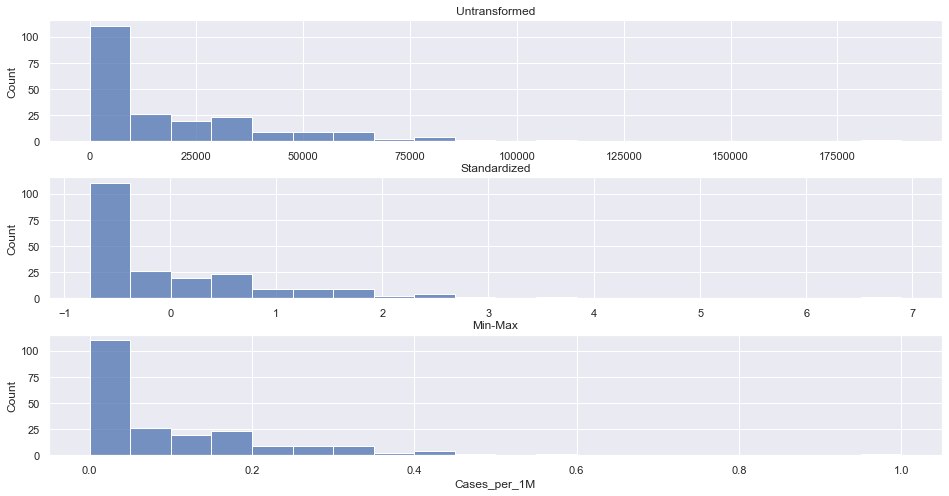

In [90]:
#Visually look at the difference of the two transformation methods compared to the original distribution:
f, ax = plt.subplots(3)
plt.subplots_adjust(hspace = 0.3)
sns.histplot(data=covid_agg, x = "Cases_per_1M", ax = ax[0])
ax[0].set_title("Untransformed")
ax[0].xaxis.label.set_visible(False)
sns.histplot(data=scaled_data, x = "Cases_per_1M", ax = ax[1])
ax[1].set_title("Standardized")
ax[1].xaxis.label.set_visible(False)
sns.histplot(data=minmax_data, x = "Cases_per_1M", ax = ax[2])
ax[2].set_title("Min-Max")
plt.show()

In [91]:
#Take a closer look at the descriptive statistics for the min-max transformed data:
minmax_data.Cases_per_1M.describe().round(1)

count    214.0
mean       0.1
std        0.1
min        0.0
25%        0.0
50%        0.0
75%        0.2
max        1.0
Name: Cases_per_1M, dtype: float64

The min-max scaling ensures that the value range is from 0-1 for all values within the Cases_per_1M column. The distribution shape looks to be maintained well. The mean and standard deviation are both 0.1. 

In [92]:
#Look at the original descriptive statistics again for all 6 features:
covid_agg.describe().transpose().round(1)

count        mean          std    min       25%        50%  \
Cases             214.0    419684.4    1825208.4    1.0    2569.5    25299.0   
Deaths            214.0      9080.2      34016.4    0.0      44.2      325.5   
Population        214.0  35842812.9  140257122.2  815.0  799804.0  6661478.0   
Cases_per_1M      214.0     18876.7      24871.8    3.3    1162.0     8371.8   
Deaths_per_1M     214.0       313.6        414.7    0.0      13.3       90.2   
Deaths_per_Cases  214.0         1.9          2.4    0.0       0.8        1.6   

                         75%           max  
Cases               182059.0  2.242301e+07  
Deaths                3106.0  3.744420e+05  
Population        24845870.2  1.433784e+09  
Cases_per_1M         30449.4  1.899757e+05  
Deaths_per_1M          474.0  1.857600e+03  
Deaths_per_Cases         2.5  2.900000e+01

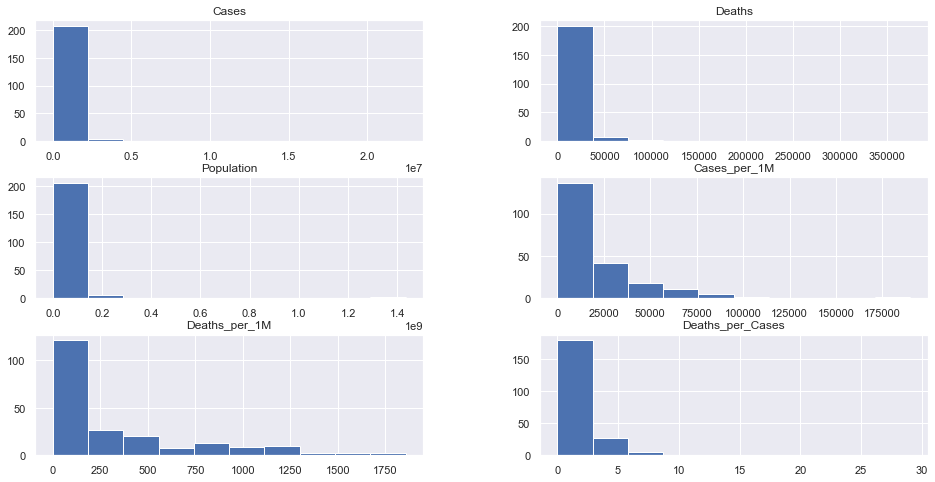

In [93]:
#Look at the distributions for the original 6 features:
covid_agg.hist()
plt.show()

In [94]:
#Look at the standard scaled transformed descriptive statistics:
scaled_data.describe().transpose().round(1)

count  mean  std  min  25%  50%  75%   max
Cases             214.0   0.0  1.0 -0.2 -0.2 -0.2 -0.1  12.1
Deaths            214.0  -0.0  1.0 -0.3 -0.3 -0.3 -0.2  10.8
Population        214.0  -0.0  1.0 -0.3 -0.3 -0.2 -0.1  10.0
Cases_per_1M      214.0   0.0  1.0 -0.8 -0.7 -0.4  0.5   6.9
Deaths_per_1M     214.0   0.0  1.0 -0.8 -0.7 -0.5  0.4   3.7
Deaths_per_Cases  214.0  -0.0  1.0 -0.8 -0.5 -0.1  0.2  11.6

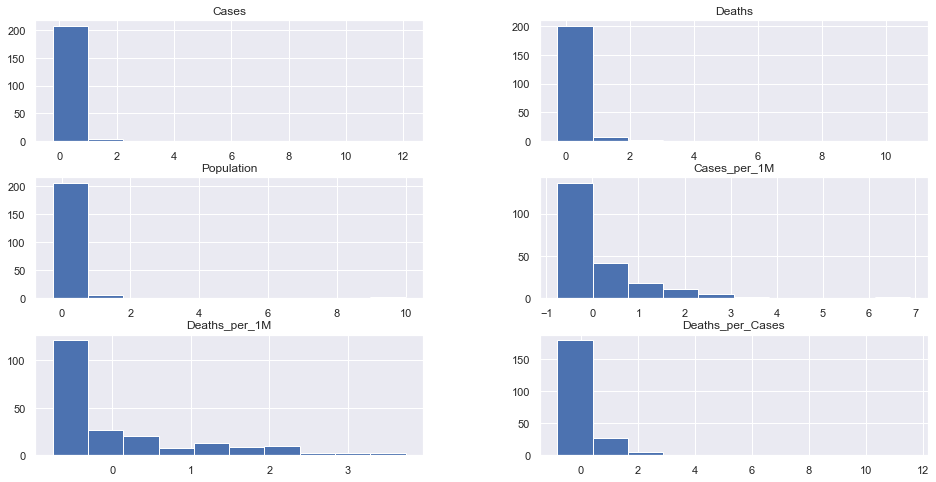

In [95]:
#Look at the standard scaled transformed distributions:
scaled_data.hist()
plt.show()

In [96]:
#Look at the min-max transformed descriptive statistics:
minmax_data.describe().transpose().round(1)

count  mean  std  min  25%  50%  75%  max
Cases             214.0   0.0  0.1  0.0  0.0  0.0  0.0  1.0
Deaths            214.0   0.0  0.1  0.0  0.0  0.0  0.0  1.0
Population        214.0   0.0  0.1  0.0  0.0  0.0  0.0  1.0
Cases_per_1M      214.0   0.1  0.1  0.0  0.0  0.0  0.2  1.0
Deaths_per_1M     214.0   0.2  0.2  0.0  0.0  0.0  0.3  1.0
Deaths_per_Cases  214.0   0.1  0.1  0.0  0.0  0.1  0.1  1.0

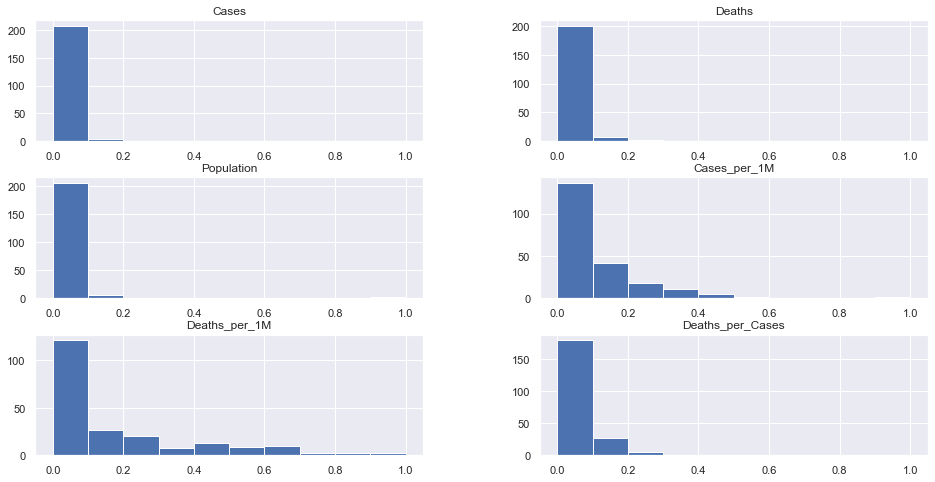

In [97]:
#Look at the min-max transformed distributions:
minmax_data.hist()
plt.show()

FINDINGS/ANALYSIS:



See above and commentary throughout.